In [8]:
import os
import torch
from tqdm import tqdm
import pandas as pd 

In [67]:

hla_df = pd.read_csv('/home/kbg32/project/HLA_27_seqs_csv.csv')
hla_dict = dict(zip(hla_df['allele'].tolist(), hla_df['seqs'].tolist()))


caron_data = ['STTTTNVTR','TGSNVFQTR','HTTDPSFLGR','RTIKVFTTV','APRITFGGP','GPMVLRGLIT','RANNTKGSL','LPYPQILLL','NAPRITFGGP','HSSGVTREL','RTIKVFTTV','KLPDDFTGC','TLNDLNETL','YLQPRTFLL','VPYNMRVI','LPYPQILLL']


#caron_data = ['SIWNLDYIINL', 'FIRQEEVQEL', 'VLQLPQGTTL','RTIKVFTTV','APRITFGGP','GPMVLRGLIT','RANNTKGSL','LPYPQILLL','NAPRITFGGP','HSSGVTREL','RTIKVFTTV','KLPDDFTGC','TLNDLNETL','YLQPRTFLL','VPYNMRVI','LPYPQILLL']

caron_hlas = ['HLA-A*68:01','HLA-A*68:01','HLA-A*68:01','HLA-A*68:01','HLA-B*07:02','HLA-B*07:02','HLA-B*07:02','HLA-B*07:02','HLA-B*07:02','HLA-A*68:02','HLA-A*02:01','HLA-A*02:01','HLA-A*02:01','HLA-A*02:01','HLA-B*51:01','HLA-B*51:01']

caron_combos = ['STTTTNVTRHLA-A*68:01','TGSNVFQTRHLA-A*68:01','HTTDPSFLGRHLA-A*68:01','RIKVFTTVHLA-A*68:01','APRITFGGPHLA-B*07:02','GPMVLRGLITHLA-B*07:02','RANNTKGSLHLA-B*07:02','LPYPQILLLHLA-B*07:02','NAPRITFGGPHLA-B*07:02','HSSGVTRELHLA-A*68:02','RTIKVFTTVHLA-A*02:01','KLPDDFTGCHLA-A*02:01','TLNDLNETLHLA-A*02:01','YLQPRTFLLHLA-A*02:01','VPYNMRVIHLA-B*51:01','LPYPQILLLHLA-B*51:01']

caron_immunos = [1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1]

caron_immuno_freqs = [0.40,0.30,0.10,0.31,0.07,0.14,0.29,0.24,0.21,0,0.31,0.36,0.24,0.44,0.33,0.24]

caron_df = pd.DataFrame(caron_data)
caron_df.columns = ['peptide']


caron_df['hla'] = caron_hlas
caron_df['combo'] = caron_combos
caron_df['immunogenicity'] = caron_immunos
caron_df['immuno_freqs'] = caron_immuno_freqs


seqs_caron = [] 

for hla in caron_df['hla'].tolist():
    seqs_caron.append(hla_dict[hla])
    
caron_df['hla_seq'] = seqs_caron


caron_df['length'] = [len(x) for x in caron_df['peptide'].tolist()]


caron_df['full_padded'] = caron_df['hla_seq'] + caron_df['peptide']

# Function to pad sequences based on their length
def pad_sequence(seq, length):
    if length == 8:
        return seq + 'JJJ'
    if length == 9:
        return seq + 'JJ'  # Add 2 'J's for length 9
    elif length == 10:
        return seq + 'J'   # Add 1 'J' for length 10
    else:
        return seq         # No padding for other lengths

# Apply the padding function to each sequence in the dataframe
caron_df['full_padded'] = caron_df.apply(lambda row: pad_sequence(row['full_padded'], row['length']), axis=1)

# Display the updated dataframe

caron_df

,peptide,hla,combo,immunogenicity,immuno_freqs,hla_seq,length,full_padded
0,STTTTNVTR,HLA-A*68:01,STTTTNVTRHLA-A*68:01,1,0.40,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
1,TGSNVFQTR,HLA-A*68:01,TGSNVFQTRHLA-A*68:01,1,0.30,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
2,HTTDPSFLGR,HLA-A*68:01,HTTDPSFLGRHLA-A*68:01,1,0.10,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,10,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
3,RTIKVFTTV,HLA-A*68:01,RIKVFTTVHLA-A*68:01,1,0.31,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
4,APRITFGGP,HLA-B*07:02,APRITFGGPHLA-B*07:02,1,0.07,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,9,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
5,GPMVLRGLIT,HLA-B*07:02,GPMVLRGLITHLA-B*07:02,1,0.14,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,10,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
6,RANNTKGSL,HLA-B*07:02,RANNTKGSLHLA-B*07:02,1,0.29,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,9,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
7,LPYPQILLL,HLA-B*07:02,LPYPQILLLHLA-B*07:02,1,0.24,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,9,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
8,NAPRITFGGP,HLA-B*07:02,NAPRITFGGPHLA-B*07:02,1,0.21,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,10,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
9,HSSGVTREL,HLA-A*68:02,HSSGVTRELHLA-A*68:02,0,0.00,SHSMRYFYTSMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...


In [3]:
neg = ['APRITFGGP']
pos = ['KLPDDFTGC','RTIKVFTTV']

In [4]:
!pwd

/gpfs/gibbs/project/krishnaswamy_smita/kbg32/Immunopred/ImmunoPred/refactor


In [69]:
import os

# Define the directory path
directory = '/home/kbg32/project/extracted_folder_FULL2/PyGs'


directory = '/gpfs/gibbs/project/krishnaswamy_smita/kbg32/Immunopred/ImmunoPred/refactor/caron_graphs'
# Define the substrings you want to search for
substrings = ['KLPDDFTGC', 'YLQPRTFLL']
# Get a list of files in the directory
file_names = os.listdir(directory)

valids = caron_df['peptide'].tolist()
#valids = [ 'SIWNLDYIINL', 'FIRQEEVQEL', 'VLQLPQGTTL']
graph_list_caron = [] 
for x in valids: 
# Filter the file names that contain either of the substrings
    matching_files = [f for f in file_names if x in f ]
    print(x)
    print(matching_files)
    graph_list_caron.append(matching_files[0])
    print('next')


STTTTNVTR
['caron_graph_rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRSTTTTNVTR_9634a.pt']
next
TGSNVFQTR
['caron_graph_rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRTGSNVFQTR_1515d.pt']
next
HTTDPSFLGR
['caron_graph_rank_1_prediction_ImmunoPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRHTTDPSFLGR_db3e4.pt']
next
RTIKVFTTV
['caron_graph_rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRRTIKVFTTV_4fe1f.pt', 'caron_graph_rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRRTIKVFTTV_67aea.pt']
next
APRITFGGP
['caron_graph_rank_1_prediction_ImmunoPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRAPRITFGGP_c6650.pt', 'caron_graph_rank_1_prediction_Immun

In [14]:
graph_list_caron = ['graph_5399rank_1_prediction_ImmunoKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRSIWNLDYIINL_9dfa6.pt',
                   'graph_6297rank_1_prediction_ImmunoPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRFIRQEEVQEL_acdae.pt',
                   'graph_7167rank_1_prediction_ImmunoPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRVLQLPQGTTL_1230a.pt']






In [70]:


#pos 
input_peptides = ['SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRKLPDDFTGCJJ']
#input_peptides = ['SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRYLQPRTFLLJJ']


#neg 
input_peptides = ['SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRAPRITFGGPJJ']

#input_pMHC_graphs = ['HMTEVVRHC_MUT_P53_graph.pt']
 
#neg 
input_pMHC_graphs2 = ['/gpfs/gibbs/project/krishnaswamy_smita/kbg32/extracted_folder_FULL2/PyGs/graph_265rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRAPRITFGGP_556a2.pt']


#pos
#input_pMHC_graphs = ['/gpfs/gibbs/project/krishnaswamy_smita/kbg32/extracted_folder_FULL2/PyGs/graph_1676rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRKLPDDFTGC_df6b9.pt']

#input_pMHC_graphs = ['/gpfs/gibbs/project/krishnaswamy_smita/kbg32/extracted_folder_FULL2/PyGs/graph_19535rank_1_prediction_ImmunoPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRYLQPRTFLL_63fb9.pt']
loaded_graphs = []
for x in input_pMHC_graphs:
    g = torch.load(x)
    loaded_graphs.append(g)
    
loaded_graphs

FileNotFoundError: [Errno 2] No such file or directory: 'graph_5399rank_1_prediction_ImmunoKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRSIWNLDYIINL_9dfa6.pt'

In [71]:
#input_caron MHC-peptide lists

input_peptides = caron_df['full_padded'].tolist()
#input_peptides = caron_df['full_padded'].tolist()[:3]

#input_caron pMHC graphs 


input_pMHC_graphs = graph_list_caron
#input_pMHC_graphs2 = ['/gpfs/gibbs/project/krishnaswamy_smita/kbg32/extracted_folder_FULL2/PyGs/graph_265rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRAPRITFGGP_556a2.pt']




loaded_graphs = []
for x in input_pMHC_graphs:
    x = directory + '/' + x
    g = torch.load(x)
    loaded_graphs.append(g)
    
loaded_graphs

[Data(edge_index=[2, 680], node_id=[188], coords=[188, 3], name='rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRSTTTTNVTR_9634a', num_nodes=188, x=[188, 22]),
 Data(edge_index=[2, 682], node_id=[188], coords=[188, 3], name='rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRTGSNVFQTR_1515d', num_nodes=188, x=[188, 22]),
 Data(edge_index=[2, 686], node_id=[189], coords=[189, 3], name='rank_1_prediction_ImmunoPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRHTTDPSFLGR_db3e4', num_nodes=189, x=[189, 22]),
 Data(edge_index=[2, 694], node_id=[188], coords=[188, 3], name='rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRRTIKVFTTV_4fe1f', num_nodes=188, x=[188, 22]),
 Data(edge_index=[2, 680], node_id=[188], coords=[188, 3], name='rank_1_prediction_ImmunoPPKTHVT

In [3]:
import pandas as pd 
cdf = pd.read_table('/home/kbg32/project/complete_score_Mprops_1_2_smoothed_sasa_v2_caron_holdout.txt')
tnegs = [ 'SIWNLDYIINL', 'FIRQEEVQEL', 'VLQLPQGTTL']
cdf[cdf['peptide'].isin(tnegs)]

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,peptide,allele,immunogenicity,aliphathic_index,boman,charge,...,Foreignness_Score,Dissimilarity_Score,quant_foreign,smoothed_foreign,master_property_score,Mprop1,Mprop2,combo,sasa_af,smoothed_af_sasa
5434,5434,5434,5434,5434,FIRQEEVQEL,HLA-A*02:01,0,107.000000,2.957000,-2.020337,...,0.000000e+00,5.118128e-14,-5.199338,-2.970561,0.379462,0.354041,0.403295,FIRQEEVQELHLA-A*02:01,7.283096,6.124333
20036,20038,20038,20038,20038,VLQLPQGTTL,HLA-A*02:01,1,146.000000,-0.352000,-0.024105,...,0.000000e+00,3.228008e-08,-5.199338,-3.709882,0.365457,0.376184,0.360100,VLQLPQGTTLHLA-A*02:01,6.120135,5.948800
20116,20118,20118,20118,20118,SIWNLDYIINL,HLA-A*02:01,1,177.272727,-0.126364,-1.024105,...,3.475804e-09,0.000000e+00,-5.199338,-3.931925,0.420697,0.409652,0.440826,SIWNLDYIINLHLA-A*02:01,8.818856,6.531489


In [4]:
cdf2 = cdf[~cdf['peptide'].isin(tnegs)]
cdf2

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,peptide,allele,immunogenicity,aliphathic_index,boman,charge,...,Foreignness_Score,Dissimilarity_Score,quant_foreign,smoothed_foreign,master_property_score,Mprop1,Mprop2,combo,sasa_af,smoothed_af_sasa
0,0,0,0,0,LSNSGKDVPK,HLA-A*11:01,0,68.000000,2.336000,0.976371,...,0.00000,0.000000e+00,-5.199338,-5.119560,0.366501,0.179436,0.490884,LSNSGKDVPKHLA-A*11:01,5.467838,5.576432
1,1,1,1,1,TTLFHTFYEL,HLA-A*24:02,0,78.000000,0.352000,-0.783389,...,0.00000,0.000000e+00,-5.199338,-5.074294,0.401047,0.330735,0.436979,TTLFHTFYELHLA-A*24:02,3.967922,5.572495
2,2,2,2,2,KFGDLTNNF,HLA-A*24:02,0,43.333333,2.033333,-0.023470,...,0.00000,0.000000e+00,-5.199338,-4.979414,0.330519,0.192958,0.424324,KFGDLTNNFHLA-A*24:02,6.196591,5.564692
3,3,3,3,3,KLFESKAEL,HLA-A*02:01,0,97.777778,1.498889,-0.021908,...,0.00000,1.465494e-14,-5.199338,-4.832563,0.346405,0.266938,0.396085,KLFESKAELHLA-A*02:01,7.051576,5.552952
4,4,4,4,4,KLFESKAELA,HLA-A*02:01,0,98.000000,1.168000,-0.021908,...,0.00000,0.000000e+00,-5.199338,-4.639388,0.363109,0.271797,0.418384,KLFESKAELAHLA-A*02:01,7.206483,5.537300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24529,24534,24534,24534,24535,DSKGRSYNL,HLA-B*08:01,1,43.333333,4.101111,0.975733,...,0.00762,2.052913e-12,0.827130,0.086094,0.387165,0.290392,0.432358,DSKGRSYNLHLA-B*08:01,4.905662,5.192546
24530,24535,24535,24535,24536,DSKKRSYNL,HLA-B*08:01,1,43.333333,4.822222,1.975574,...,0.99238,1.666419e-01,1.067571,-0.377174,0.435194,0.298521,0.501794,DSKKRSYNLHLA-B*08:01,5.650996,5.184949
24531,24536,24536,24536,24537,TDLGQNLLY,HLA-A*01:01,1,130.000000,0.878889,-1.024105,...,1.00000,9.841214e-01,5.199338,-0.843474,0.360162,0.374864,0.329334,TDLGQNLLYHLA-A*01:01,4.722892,5.184300
24532,24537,24537,24537,24538,AVVSLLRLLK,HLA-A*11:01,1,224.000000,-0.570000,1.975733,...,0.00000,9.997602e-01,-5.199338,-1.233433,0.532929,0.502696,0.509585,AVVSLLRLLKHLA-A*11:01,6.592101,5.186483


In [57]:
cdf_neg = cdf[cdf['peptide'].isin(tnegs)]
cdf_neg['Mprop1']

5434     0.354041
20036    0.376184
20116    0.409652
Name: Mprop1, dtype: float64

In [58]:
cdf_neg['Mprop2']

5434     0.403295
20036    0.360100
20116    0.440826
Name: Mprop2, dtype: float64

In [30]:
cdf2.to_csv('complete_score_Mprops_1_2_smoothed_sasa_v2_caron_holdout3.txt', sep = '\t')

In [82]:
cdf2[cdf2['immunogenicity'] == 1]['Mprop1'].mean()

0.4058420577914152

In [81]:
cdf2[cdf2['immunogenicity'] == 1]['Mprop2'].mean()

0.3975586987161581

In [40]:
input_peptides

['SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDRNTRNVKAQSQTDRVDLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYRQDAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQWRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRSIWNLDYIINL',
 'SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDRNTRNVKAQSQTDRVDLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYRQDAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQWRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRFIRQEEVQELJ',
 'SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDRNTRNVKAQSQTDRVDLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYRQDAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQWRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRVLQLPQGTTLJ']

In [17]:
scores

NameError: name 'scores' is not defined

In [72]:
scores = [0] * 16



for data, score in zip(loaded_graphs, scores):
    data.y = torch.tensor([score], dtype=torch.float)  # We use a one-element tensor for each graph-level label
    data.x = data.x[:, :-2]
    data.x = torch.cat([data.x, data.coords], dim=-1)
    
    data.x = data.x.to(dtype=torch.float32)
    data.y = data.y.to(dtype=torch.float32)

In [73]:
loaded_graphs

[Data(edge_index=[2, 680], node_id=[188], coords=[188, 3], name='rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRSTTTTNVTR_9634a', num_nodes=188, x=[188, 23], y=[1]),
 Data(edge_index=[2, 682], node_id=[188], coords=[188, 3], name='rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRTGSNVFQTR_1515d', num_nodes=188, x=[188, 23], y=[1]),
 Data(edge_index=[2, 686], node_id=[189], coords=[189, 3], name='rank_1_prediction_ImmunoPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRHTTDPSFLGR_db3e4', num_nodes=189, x=[189, 23], y=[1]),
 Data(edge_index=[2, 694], node_id=[188], coords=[188, 3], name='rank_1_prediction_ImmunoAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWVAVVVPSGQEQRYTCHVQHEGLPKPLTLRRTIKVFTTV_4fe1f', num_nodes=188, x=[188, 23], y=[1]),
 Data(edge_index=[2, 680], node_id=[188], coords=[188, 3], name='ran

In [74]:
import torch
from torch_geometric.data import Data

def pad_graph(graph, max_nodes, feature_size, coord_size):
    num_nodes_to_add = max_nodes - graph.num_nodes
    if num_nodes_to_add > 0:
        # Pad node features
        zero_features = torch.zeros(num_nodes_to_add, feature_size)
        padded_features = torch.cat([graph.x, zero_features], dim=0)

        # Pad coordinates
        zero_coords = torch.zeros(num_nodes_to_add, coord_size)
        padded_coords = torch.cat([graph.coords, zero_coords], dim=0)

        # Update the graph
        graph.x = padded_features
        graph.coords = padded_coords
        graph.num_nodes = max_nodes
    return graph

# Example usage
graphs_to_pad = loaded_graphs  # Replace with your list of graphs
max_nodes = 190
feature_size = 23  # Replace with the size of your feature vectors
coord_size = 3     # Replace with the size of your coordinate vectors

padded_graphs = [pad_graph(graph, max_nodes, feature_size, coord_size) for graph in graphs_to_pad]

In [75]:
filtered_graphs = padded_graphs

In [76]:
from torch_geometric.data import Data
import torch

# Assuming 'graphs' is your list of graph data objects
for graph in filtered_graphs:
    # The number of edges is half the size of the second dimension of edge_index
    num_edges = graph.edge_index.size(1)
    
    # Create a tensor of ones with the size equal to the number of edges
    # Assuming all edges have a single feature, which is set to 1
    graph.edge_attr = torch.ones((num_edges, 1))
    
    
    
import torch
import dgl
#from egnn_pytorch import EGNNConv
from torch_geometric.data import Data

dgl_filtered_graphs = []
for g in filtered_graphs:
    # Example PyTorch Geometric graph (replace with your actual graph)
    #print(g.name)
    pt_geometric_graph = g

    # Convert to DGL graph
    src, dst = pt_geometric_graph.edge_index
    dgl_graph = dgl.graph((src, dst), num_nodes=pt_geometric_graph.num_nodes)
    dgl_graph.ndata['x'] = pt_geometric_graph.x  # Node features
    dgl_graph.edata['edge_attr'] = pt_geometric_graph.edge_attr  # Edge attributes

    # Extracting node features and coordinate features from dgl_graph
    node_feat = dgl_graph.ndata['x'][:, :20]  # First 20 features are node features
    coord_feat = dgl_graph.ndata['x'][:, 20:]  # Last 3 features are coordinate features

    # Using EGNNConv
    #conv = EGNNConv(20, 200, 20)  # Adjust dimensions according to your model

    # Forward pass through EGNNConv
    #h, x = conv(dgl_graph, node_feat, coord_feat)
    dgl_filtered_graphs.append(dgl_graph)

In [77]:
dgl_filtered_graphs

[Graph(num_nodes=190, num_edges=680,
       ndata_schemes={'x': Scheme(shape=(23,), dtype=torch.float32)}
       edata_schemes={'edge_attr': Scheme(shape=(1,), dtype=torch.float32)}),
 Graph(num_nodes=190, num_edges=682,
       ndata_schemes={'x': Scheme(shape=(23,), dtype=torch.float32)}
       edata_schemes={'edge_attr': Scheme(shape=(1,), dtype=torch.float32)}),
 Graph(num_nodes=190, num_edges=686,
       ndata_schemes={'x': Scheme(shape=(23,), dtype=torch.float32)}
       edata_schemes={'edge_attr': Scheme(shape=(1,), dtype=torch.float32)}),
 Graph(num_nodes=190, num_edges=694,
       ndata_schemes={'x': Scheme(shape=(23,), dtype=torch.float32)}
       edata_schemes={'edge_attr': Scheme(shape=(1,), dtype=torch.float32)}),
 Graph(num_nodes=190, num_edges=680,
       ndata_schemes={'x': Scheme(shape=(23,), dtype=torch.float32)}
       edata_schemes={'edge_attr': Scheme(shape=(1,), dtype=torch.float32)}),
 Graph(num_nodes=190, num_edges=696,
       ndata_schemes={'x': Scheme(shape=(23

In [78]:
import numpy as np


# Function to pad peptide sequences
def pad_peptide_sequence(sequence, max_length=11, padding_char='J'):
    # Pad the sequence with the padding character to reach the max length
    padded_sequence = sequence.ljust(max_length, padding_char)
    return padded_sequence

# Example usage
peptides2 = input_peptides # Add your list of peptides here
padded_peptides = [pad_peptide_sequence(pep) for pep in peptides2]



def one_hot_encode_sequence(sequence, amino_acids, padding_char='J'):
    # Create a dictionary mapping each amino acid and padding character to an integer
    char_to_int = dict((c, i) for i, c in enumerate(amino_acids + padding_char))

    # Initialize the one-hot encoded matrix for the sequence
    one_hot_encoded = np.zeros((len(sequence), len(char_to_int)))

    # Fill the one-hot encoded matrix with appropriate values
    for i, char in enumerate(sequence):
        if char in char_to_int:  # Only encode known characters
            one_hot_encoded[i, char_to_int[char]] = 1
    
    return one_hot_encoded

# Define the amino acids and padding character
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'  # 20 standard amino acids
padding_char = 'J'

# Assuming you have a list of sequences named 'protein_sequences'
encoded_sequences = [one_hot_encode_sequence(seq, amino_acids, padding_char) for seq in padded_peptides]

# Example: Checking the shape of the first encoded sequence
print(encoded_sequences[0].shape)  # Should print (283, 21)

(283, 21)


In [79]:
len(encoded_sequences)

16

In [80]:
!pwd

/gpfs/gibbs/project/krishnaswamy_smita/kbg32/Immunopred/ImmunoPred/refactor


In [31]:
import torch
import wandb
import yaml
from dgl.dataloading import GraphDataLoader

from data import ImmunoPredDataset, collate, SplitDataset
from models.mapping import model_map
from utils import Losses, plot_losses
from infer import inference

config = "/home/kbg32/project/Immunopred/ImmunoPred/refactor/config.yaml"
with open(config) as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)


device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")
print(device)

learning_rate_a = cfg["learning_rate_a"]
learning_rate_b = cfg["learning_rate_b"]
num_epochs = cfg["num_epochs"]
batch_size = cfg["batch_size"]
#num_epochs = 5


torch.manual_seed(cfg["seed"])

generator = torch.Generator().manual_seed(cfg["seed"])

# Training loop
def train_model(model, train_loader, val_loader, optimizer, losses, experiment_name = ""):
    train_losses = []
    val_losses = []
    
    lowest_val_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for graph_data, sequence_data, target, peptide_property in train_loader:
            graph_data = graph_data.to(device)
            sequence_data, target, peptide_property = sequence_data.to(device), target.to(device), peptide_property.to(device)

            optimizer.zero_grad()
            recon_batch, mu, logvar, final_output = model(graph_data, sequence_data, peptide_property)

            loss = losses.regression_loss(recon_batch, sequence_data, mu, logvar, final_output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for graph_data, sequence_data, target, peptide_property in val_loader:
                graph_data = graph_data.to(device)
                sequence_data, target, peptide_property = sequence_data.to(device), target.to(device), peptide_property.to(device)

                recon_batch, mu, logvar, final_output = model(graph_data, sequence_data, peptide_property)
                loss = losses.regression_loss(recon_batch,sequence_data, mu, logvar, final_output, target)
                val_loss += loss.item()

        if val_loss < lowest_val_loss:
            torch.save(model.state_dict(), experiment_name + ".pt")
            lowest_val_loss = val_loss

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        wandb.log({
            "pretrain_train_loss": train_loss, 
            "pretrain_val_loss": val_loss
        })

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses

# finetune with different dataset
def finetune_model(model, train_loader, val_loader, optimizer, losses, experiment_name = ""):
    train_losses = []
    val_losses = []
    
    lowest_val_loss = float('inf')
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for graph_data, sequence_data, target, peptide_property in train_loader:

            graph_data = graph_data.to(device)
            sequence_data, target, peptide_property = sequence_data.to(device), target.to(device), peptide_property.to(device)

            optimizer.zero_grad()
            recon_batch, mu, logvar, final_output = model(graph_data, sequence_data, peptide_property)

            loss = losses.BCE_loss(recon_batch, sequence_data, mu, logvar, final_output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation loop
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for graph_data, sequence_data, target, peptide_property in val_loader:
                graph_data = graph_data.to(device)
                sequence_data, target, peptide_property = sequence_data.to(device), target.to(device), peptide_property.to(device)

                recon_batch, mu, logvar, final_output = model(graph_data, sequence_data, peptide_property)
                loss = losses.BCE_loss(recon_batch, sequence_data, mu, logvar, final_output, target)
                val_loss += loss.item()

        if val_loss < lowest_val_loss:
            torch.save(model.state_dict(), experiment_name + ".pt")
            lowest_val_loss = val_loss

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        wandb.log({
            "finetune_train_loss": train_loss, 
            "finetune_val_loss": val_loss
        })

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
    return train_losses, val_losses

if __name__ == '__main__':

    wandb.init(
        # set the wandb project where this run will be logged
        project="ImmunoPred-Final-IEDB",
        entity="immunoteam",

        # track hyperparameters and run metadata
        config=cfg
    )

    ## Train Dataset
    dataset = ImmunoPredDataset(config, '/gpfs/gibbs/project/krishnaswamy_smita/kbg32/extracted_folder_FULL2/PyGs', 
                                #'/home/kbg32/project/complete_score_Mprops_1_2_smoothed_sasa_v2.txt', 
                                
                                #use this file for holding out caron samples during training 
                                
                                #'/home/kbg32/project/complete_score_Mprops_1_2_smoothed_sasa_v2_caron_holdout.txt',
                                '/gpfs/gibbs/project/krishnaswamy_smita/kbg32/Immunopred/ImmunoPred/refactor/complete_score_Mprops_1_2_smoothed_sasa_v2_caron_holdout3.txt',
                                
                                '/home/kbg32/project/HLA_27_seqs_csv.csv')#, binary=False)
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.10, 0.10], generator)
    print(len(train_dataset), len(val_dataset), len(test_dataset))

    # Use this so that we do augmentations on just train dataset
    train_split_dataset = SplitDataset(train_dataset, "train", binary=False, full=cfg["full_sequence"])
    val_split_dataset = SplitDataset(val_dataset, "val", binary=False, full=cfg["full_sequence"])
    test_split_dataset = SplitDataset(test_dataset, "test", binary=False, full=cfg["full_sequence"])

    train_loader = GraphDataLoader(train_split_dataset, batch_size=batch_size, collate_fn=collate, shuffle=True)
    val_loader = GraphDataLoader(val_split_dataset, batch_size=batch_size, collate_fn=collate, shuffle=False)
    test_loader = GraphDataLoader(test_split_dataset, batch_size=batch_size, collate_fn=collate, shuffle=False)

    # input_dim = sequence length (11 for peptide, 283 for sequence) * embedding
    input_dim = 283 * 21 if cfg["full_sequence"] else 11 * 21
    model = model_map[cfg["model"]](vae_input_dim=input_dim, device=device)
    model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate_a)
    losses = Losses(input_dim, dataset.class_weights, sequence=cfg["sequence_loss"])

    train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, losses, experiment_name="train_model")
    # plot_losses(train_losses, val_losses)

    print("DONE PRE-TRAINING")

    ## Finetune Dataset
    model.load_trained("train_model.pt", new_head=True)

    # Use this so that we do augmentations on just train dataset
    train_split_dataset_b = SplitDataset(train_dataset, "train", binary=True, full=cfg["full_sequence"])
    val_split_dataset_b = SplitDataset(val_dataset, "val", binary=True, full=cfg["full_sequence"])
    test_split_dataset_b = SplitDataset(test_dataset, "test", binary=True, full=cfg["full_sequence"])

    train_loader_b = GraphDataLoader(train_split_dataset_b, batch_size=batch_size, collate_fn=collate, shuffle=True)
    val_loader_b = GraphDataLoader(val_split_dataset_b, batch_size=batch_size, collate_fn=collate, shuffle=False)
    test_loader_b = GraphDataLoader(test_split_dataset_b, batch_size=batch_size, collate_fn=collate, shuffle=False)

    optimizer_b = torch.optim.Adam(model.parameters(), lr=learning_rate_b, weight_decay=1e-6)
    train_losses, val_losses = finetune_model(model, train_loader_b, val_loader_b, optimizer_b, losses, experiment_name="finetune_model")
    # plot_losses(train_losses, val_losses)

    print("DONE FINE TUNING")

    model.load_trained("finetune_model.pt", new_head=False)
    
    accuracy, precision, recall, f1, roc_auc = inference(model, train_loader_b, device)
    wandb.log({
        'Train Accuracy': accuracy,
        'Train Precision': precision,
        'Train Recall': recall,
        'Train F1 Score': f1,
        'Train ROC AUC': roc_auc
    })

    accuracy, precision, recall, f1, roc_auc = inference(model, test_loader_b, device)
    
    wandb.log({
        'Test Accuracy': accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F1 Score': f1,
        'Test ROC AUC': roc_auc
    })

cuda


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


Loading graphs: 100%|██████████| 24607/24607 [00:17<00:00, 1411.98it/s]


Loaded 24607 graphs.
new sequence table size: 23334, removed 1197
new graph list size: 23334, removed 5
peptide
Counter({0: 18582, 1: 4752})
dupes 0 0
Preprocess Complete
18668 2333 2333
Epoch 1, Train Loss: 0.4535, Val Loss: 0.3628
Epoch 2, Train Loss: 0.3718, Val Loss: 0.3544
Epoch 3, Train Loss: 0.3586, Val Loss: 0.3508
Epoch 4, Train Loss: 0.3169, Val Loss: 0.2671
Epoch 5, Train Loss: 0.2707, Val Loss: 0.2319
Epoch 6, Train Loss: 0.2427, Val Loss: 0.2404
Epoch 7, Train Loss: 0.2196, Val Loss: 0.2237
Epoch 8, Train Loss: 0.2017, Val Loss: 0.1793
Epoch 9, Train Loss: 0.1875, Val Loss: 0.1788
Epoch 10, Train Loss: 0.1772, Val Loss: 0.2333
Epoch 11, Train Loss: 0.1688, Val Loss: 0.1481
Epoch 12, Train Loss: 0.1616, Val Loss: 0.1438
Epoch 13, Train Loss: 0.1525, Val Loss: 0.1356
Epoch 14, Train Loss: 0.1444, Val Loss: 0.1379
Epoch 15, Train Loss: 0.1418, Val Loss: 0.1529
Epoch 16, Train Loss: 0.1429, Val Loss: 0.1428
Epoch 17, Train Loss: 0.1358, Val Loss: 0.1211
Epoch 18, Train Loss: 0

In [32]:
embeddings = []
true_targets = []
predicted_targets = []
predicted_targets_probs = [] 
probs_raw = []


model.to('cuda')
with torch.no_grad():
    for graph_data, sequence_data, target, peptide_property in test_loader_b:
        graph_data = graph_data.to(device)
        sequence_data, target, peptide_property = sequence_data.to(device), target.to(device), peptide_property.to(device)

        emb, _, _, final_output = model(graph_data, sequence_data, peptide_property, return_embedding = True)
        embeddings.append(emb.cpu().numpy())
        
        
        
        _, _, _, final_output = model(graph_data, sequence_data, peptide_property)
        
        probs = torch.sigmoid(final_output).squeeze()
        
        probs_raw.append(probs.cpu())
        
        probs = np.round(probs.cpu())

        # Store true targets and predicted targets
        true_targets.extend(target.cpu().numpy())
        predicted_targets.extend(final_output.cpu().numpy().flatten())
        predicted_targets_probs.extend(probs.cpu().numpy().flatten())

       # print(embeddings)
        
        
# Convert lists to arrays for plotting
true_targets = np.array(true_targets)
predicted_targets = np.array(predicted_targets)
#predicted_targets_raw = np.array(probs_raw)
predicted_targets_probs = np.array(predicted_targets_probs)
embeddings2 = np.concatenate(embeddings)

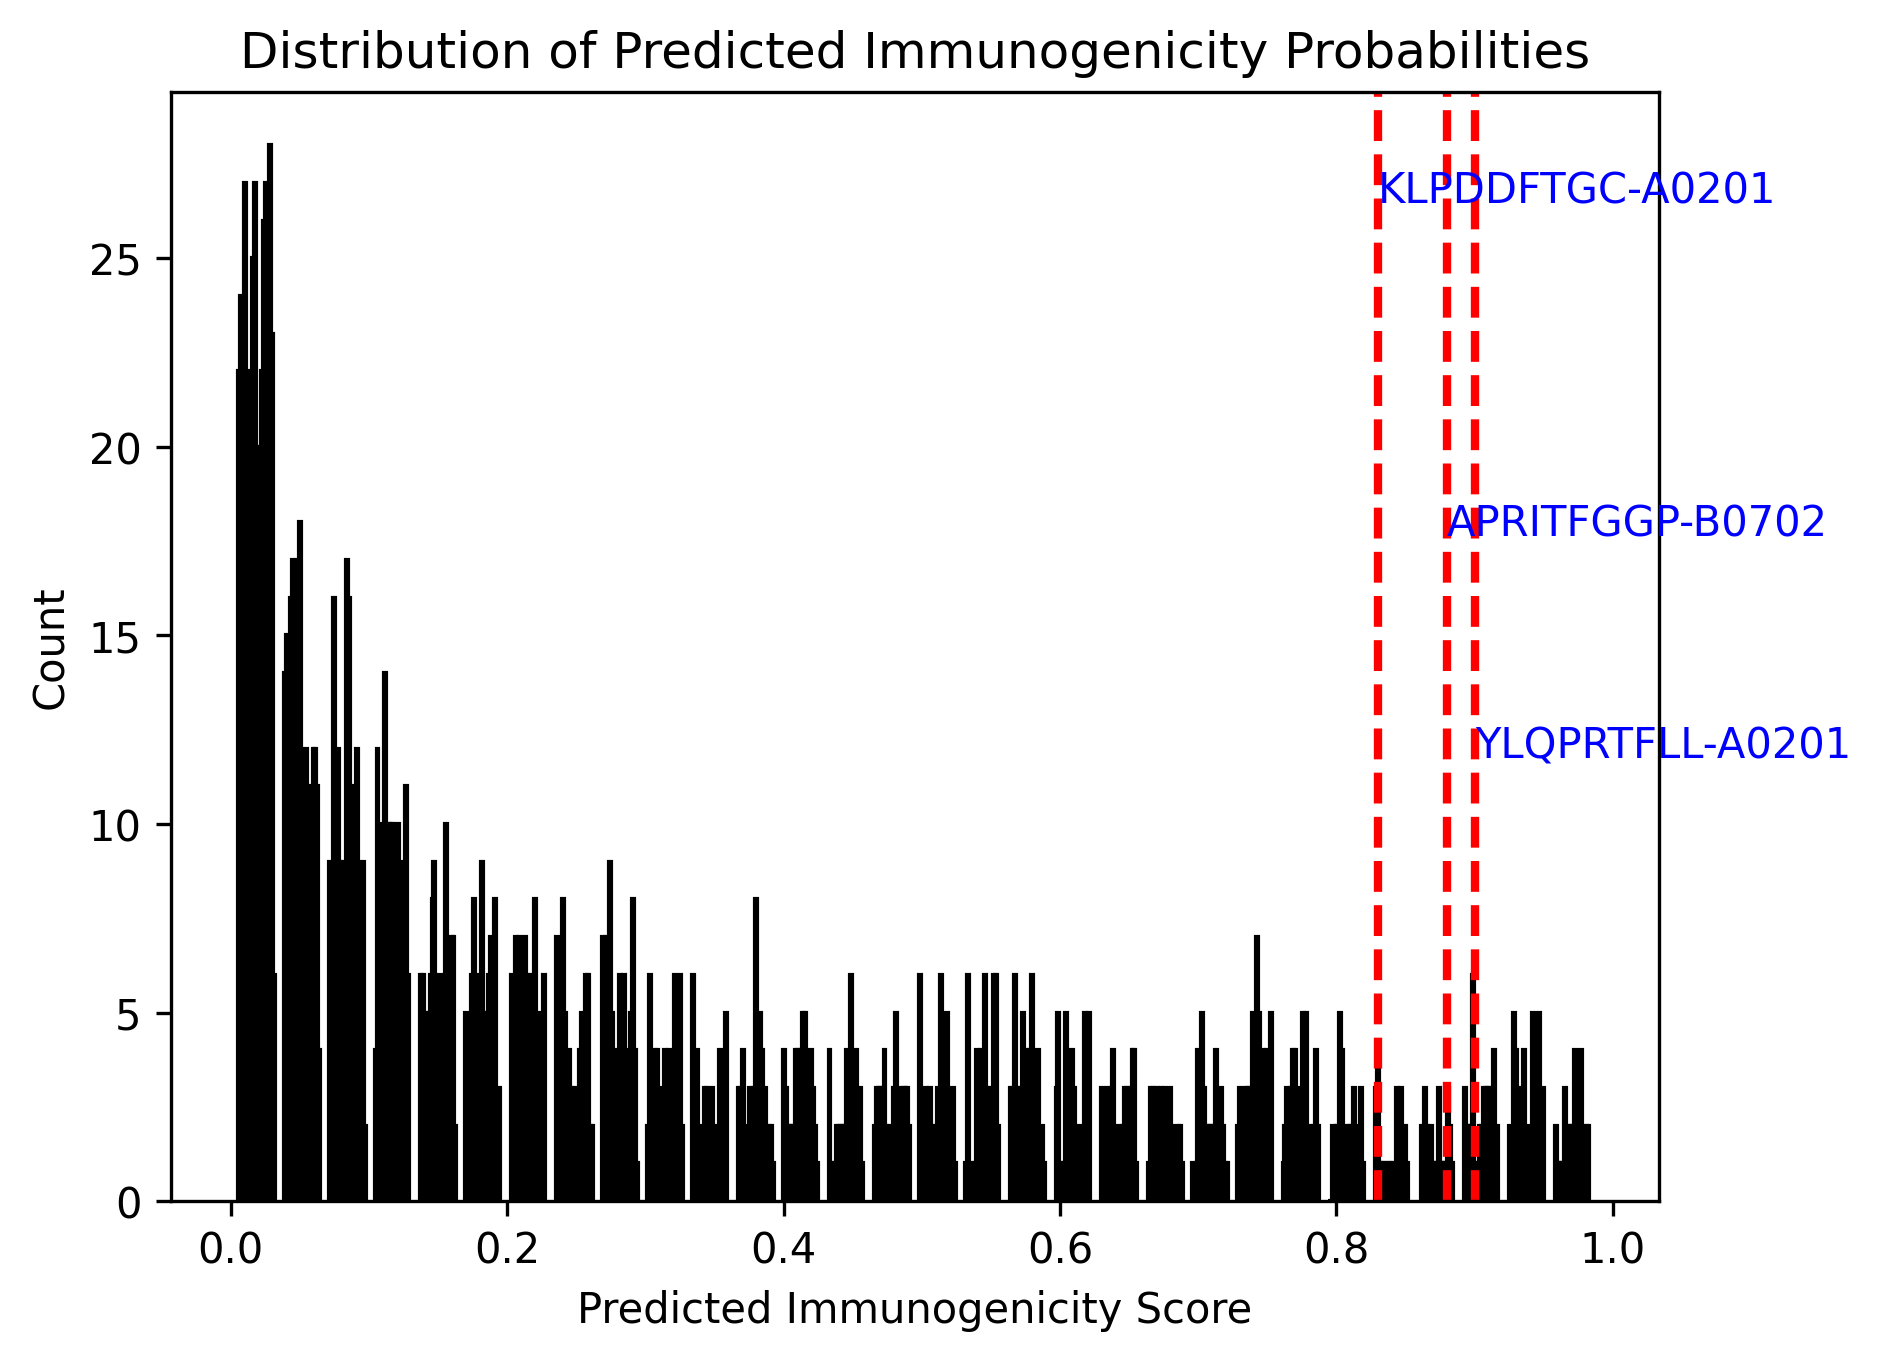

In [33]:
numbers = probs_raw


import matplotlib.pyplot as plt


# Create a figure with a higher DPI (e.g., 200)
plt.figure(dpi=300)
# Create a histogram to visualize the distribution
plt.hist(numbers, bins=30, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Predicted Immunogenicity Probabilities')
plt.xlabel('Predicted Immunogenicity Score')
plt.ylabel('Count')

# Add a red vertical line at 0.73
plt.axvline(x=0.83, color='red', linestyle='--', linewidth=2, label='KLPDDFTGC-A0201')
plt.axvline(x=0.90, color='red', linestyle='--', linewidth=2, label='KLPDDFTGC-A0201')
plt.axvline(x=0.88, color='red', linestyle='--', linewidth=2, label='KLPDDFTGC-A0201')


# Add a label for the red line
plt.text(0.83, plt.ylim()[1] * 0.9, 'KLPDDFTGC-A0201', color='blue', ha='left')

# Add a label for the red line
plt.text(0.90, plt.ylim()[1] * 0.4, 'YLQPRTFLL-A0201', color='blue', ha='left')

plt.text(0.88, plt.ylim()[1] * 0.6, 'APRITFGGP-B0702', color='blue', ha='left')



# Display the plot
plt.show()

In [34]:
len(encoded_sequences_array)

NameError: name 'encoded_sequences_array' is not defined

In [43]:
encoded_sequences[0].shape

(283, 21)

In [44]:
len(encoded_sequences)

3

In [46]:
trained_model = model 

trained_model.to('cpu')
encoded_sequences_array = np.array(encoded_sequences)
X_train_tensor = torch.tensor(encoded_sequences_array, dtype=torch.float32)
#tensor_f = torch.tensor(f_array, dtype=torch.float32).view(-1, 1)


#example mprop1 and mprop2 values 
#pos 
tensor_f = torch.tensor([[0.225891, 0.352970]])
#neg 
#tensor_f = torch.tensor([[0.323725,0.456295]])


attention_weights, _, _, final_output = trained_model(dgl_filtered_graphs[0], X_train_tensor[0], tensor_f, return_attention = True)




final_output

tensor([[-5.5113]], grad_fn=<AddmmBackward0>)

In [47]:
embeddings = []
true_targets = []
predicted_targets = []
predicted_targets_probs = [] 

device = 'cuda'
model.to('cuda')

with torch.no_grad():
    for graph_data, sequence_data, target, peptide_property in train_loader_b:
        graph_data = graph_data.to(device)
        sequence_data, target, peptide_property = sequence_data.to(device), target.to(device), peptide_property.to(device)

        print(graph_data)
        
        print(sequence_data[0].shape)
        
        emb, _, _, final_output = model(graph_data, sequence_data, peptide_property, return_embedding = True)
        embeddings.append(emb.cpu().numpy())
        
        
        
        _, _, _, final_output = model(graph_data, sequence_data, peptide_property)
        
        probs = torch.sigmoid(final_output).squeeze()
        probs = np.round(probs.cpu())

        # Store true targets and predicted targets
        true_targets.extend(target.cpu().numpy())
        predicted_targets.extend(final_output.cpu().numpy().flatten())
        predicted_targets_probs.extend(probs.cpu().numpy().flatten())

        print(predicted_targets)
        
        break 
        
        
# Convert lists to arrays for plotting
true_targets = np.array(true_targets)
predicted_targets = np.array(predicted_targets)
predicted_targets_probs = np.array(predicted_targets_probs)
embeddings2 = np.concatenate(embeddings)






Graph(num_nodes=24320, num_edges=88870,
      ndata_schemes={'x': Scheme(shape=(23,), dtype=torch.float32)}
      edata_schemes={'edge_attr': Scheme(shape=(1,), dtype=torch.float32)})
torch.Size([283, 21])
[2.5813622, 0.64306915, -1.280731, -1.9087539, 0.44579107, 3.3151724, 1.8361733, -0.73169005, -4.617063, -1.1910532, -3.3538177, 2.1772864, -2.7956085, -1.848751, 0.81628275, -2.1219556, 0.25941098, 0.45586616, -1.2358645, -0.19218127, -0.16622888, -1.5199394, 1.4236159, 0.14666547, -2.3672738, 1.7378075, -4.219066, -2.8472981, -2.1940575, -4.3652287, -2.5484304, 0.77276206, -2.208386, -3.569164, -1.4165633, -0.14894392, -2.496457, 1.6661813, -2.4214354, -4.335673, 0.11475658, -3.6508875, 0.9852992, 0.3287745, -2.772638, 3.229704, 0.67040455, -1.3995091, -1.9481933, -2.3344274, -1.880724, -1.61295, 1.3665137, 1.0469432, -2.806107, 1.4738736, -4.0220237, -4.963342, -1.4524007, -0.57974064, -0.6178656, -2.218167, -2.5337913, 0.3404795, -3.649641, -1.75794, 0.95238197, 1.8574561, -2.571

In [48]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc


model.to(device)

def inference(model, data_loader, device):
    model.eval()
    true_targets = []
    predicted_probs = []  # Store raw probabilities for ROC AUC and PR AUC calculations
    predicted_labels = []  # Store binary predictions for other metrics

    with torch.no_grad():
        for graph_data, sequence_data, target, peptide_property in data_loader:
            graph_data = graph_data.to(device)
            sequence_data, target, peptide_property = sequence_data.to(device), target.to(device), peptide_property.to(device)

            _, _, _, final_output = model(graph_data, sequence_data, peptide_property)

            # Convert to probabilities
            probs = torch.sigmoid(final_output).squeeze()

            # Handle the case where probs is a scalar
            if probs.ndim == 0:
                probs = probs.unsqueeze(0)  # Make it a 1-element tensor

            probs = probs.cpu().numpy()

            # Convert probabilities to binary predictions
            predicted = np.round(probs)

            true_targets.extend(target.cpu().numpy())
            predicted_probs.extend(probs.tolist())  # Convert to list before extending
            predicted_labels.extend(predicted)

    # Calculate metrics
    true_targets = np.array(true_targets)
    predicted_probs = np.array(predicted_probs)
    predicted_labels = np.array(predicted_labels)

    accuracy = accuracy_score(true_targets, predicted_labels)
    precision = precision_score(true_targets, predicted_labels)
    recall = recall_score(true_targets, predicted_labels)
    f1 = f1_score(true_targets, predicted_labels)
    roc_auc = roc_auc_score(true_targets, predicted_probs)

    # Calculate precision-recall curve and PR AUC
    precision_curve, recall_curve, _ = precision_recall_curve(true_targets, predicted_probs)
    pr_auc = auc(recall_curve, precision_curve)  # Calculate the area under the curve

    print('metrics')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'PR AUC: {pr_auc:.4f}')  # Print PR AUC

    return accuracy, precision, recall, f1, roc_auc, pr_auc


In [49]:
accuracy, precision, recall, f1, roc_auc, pr_auc = inference(model, test_loader_b, device)

metrics
Accuracy: 0.8371
Precision: 0.5941
Recall: 0.7333
F1 Score: 0.6564
ROC AUC: 0.8869
PR AUC: 0.7113


In [50]:
X_train_tensor.shape

torch.Size([3, 283, 21])

In [83]:
model.to('cpu')

#example mprop1 and mprop2 values 
#pos 


encoded_sequences_array = np.array(encoded_sequences)
X_train_tensor = torch.tensor(encoded_sequences_array, dtype=torch.float32)
#tensor_f = torch.tensor(f_array, dtype=torch.float32).view(-1, 1)


tensor_f = torch.tensor([[0.323725,0.456295]])
#pos
#tensor_f = torch.tensor([[0.407649,0.441499]])
#tensor_f = torch.tensor([[0, 0]])
# Repeat the values to make it 16 dimensions

repeats = 16 // tensor_f.shape[1]  # How many times to repeat the current values
tensor_f_expanded = tensor_f.repeat(1, repeats)  # Repeat along the second dimension



caron_preds = [] 

for graph, sequence, freq, raw_pep, in zip(dgl_filtered_graphs, encoded_sequences,caron_immuno_freqs,caron_data):
    
    #print(graph)

    X_train_tensor = np.array(sequence)
    
    X_train_tensor = torch.tensor(X_train_tensor, dtype=torch.float32)
    
    tensor_f = torch.tensor([[0.41,0.40]])
    
    attention_weights, _, _, final_output = model(graph, X_train_tensor, tensor_f, return_attention = True)


    print(raw_pep, torch.sigmoid(final_output).squeeze(), freq)
    
    final_pred = torch.sigmoid(final_output).squeeze()
    caron_preds.append(torch.sigmoid(final_output).squeeze().detach().numpy())



STTTTNVTR tensor(0.8175, grad_fn=<SqueezeBackward0>) 0.4
TGSNVFQTR tensor(0.9273, grad_fn=<SqueezeBackward0>) 0.3
HTTDPSFLGR tensor(0.9076, grad_fn=<SqueezeBackward0>) 0.1
RTIKVFTTV tensor(0.6943, grad_fn=<SqueezeBackward0>) 0.31
APRITFGGP tensor(0.8632, grad_fn=<SqueezeBackward0>) 0.07
GPMVLRGLIT tensor(0.6656, grad_fn=<SqueezeBackward0>) 0.14
RANNTKGSL tensor(0.9775, grad_fn=<SqueezeBackward0>) 0.29
LPYPQILLL tensor(0.0973, grad_fn=<SqueezeBackward0>) 0.24
NAPRITFGGP tensor(0.9254, grad_fn=<SqueezeBackward0>) 0.21
HSSGVTREL tensor(0.9101, grad_fn=<SqueezeBackward0>) 0
RTIKVFTTV tensor(0.8930, grad_fn=<SqueezeBackward0>) 0.31
KLPDDFTGC tensor(0.9370, grad_fn=<SqueezeBackward0>) 0.36
TLNDLNETL tensor(0.9392, grad_fn=<SqueezeBackward0>) 0.24
YLQPRTFLL tensor(0.6223, grad_fn=<SqueezeBackward0>) 0.44
VPYNMRVI tensor(0.1521, grad_fn=<SqueezeBackward0>) 0.33
LPYPQILLL tensor(0.0535, grad_fn=<SqueezeBackward0>) 0.24


In [66]:
tnegs_preds = ['0.007','0.294','0.424']

In [84]:
caron_preds = [float(x) for x in caron_preds]
caron_preds

[0.8174795508384705,
 0.9272885322570801,
 0.9075639247894287,
 0.6942750811576843,
 0.8632376194000244,
 0.6656389832496643,
 0.9775354266166687,
 0.09730475395917892,
 0.9254145622253418,
 0.91013503074646,
 0.893040657043457,
 0.9369542002677917,
 0.939217209815979,
 0.6222529411315918,
 0.15206278860569,
 0.05349838361144066]

In [119]:
caron_df

,peptide,hla,combo,immunogenicity,immuno_freqs,hla_seq,length,full_padded
0,STTTTNVTR,HLA-A*68:01,STTTTNVTRHLA-A*68:01,1,0.40,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
1,TGSNVFQTR,HLA-A*68:01,TGSNVFQTRHLA-A*68:01,1,0.30,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
2,HTTDPSFLGR,HLA-A*68:01,HTTDPSFLGRHLA-A*68:01,1,0.10,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,10,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
3,RTIKVFTTV,HLA-A*68:01,RIKVFTTVHLA-A*68:01,1,0.31,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...
4,APRITFGGP,HLA-B*07:02,APRITFGGPHLA-B*07:02,1,0.07,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,9,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
5,GPMVLRGLIT,HLA-B*07:02,GPMVLRGLITHLA-B*07:02,1,0.14,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,10,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
6,RANNTKGSL,HLA-B*07:02,RANNTKGSLHLA-B*07:02,1,0.29,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,9,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
7,LPYPQILLL,HLA-B*07:02,LPYPQILLLHLA-B*07:02,1,0.24,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,9,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
8,NAPRITFGGP,HLA-B*07:02,NAPRITFGGPHLA-B*07:02,1,0.21,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...,10,SHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREEP...
9,HSSGVTREL,HLA-A*68:02,HSSGVTRELHLA-A*68:02,0,0.00,SHSMRYFYTSMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,9,SHSMRYFYTSMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...


In [120]:
caron_peps_full = caron_df['peptide'].tolist() + tnegs
caron_immuno_full = caron_df['immunogenicity'].tolist() + [0,0,0]
caron_hla_full = caron_df['hla'].tolist() + ['HLA-A*02:01','HLA-A*02:01','HLA-A*02:01']

caron_plot_df = pd.DataFrame(caron_peps_full)
caron_plot_df.columns = ['peptide']


caron_plot_df['hla'] = caron_hla_full

caron_plot_df['true_immuno'] = caron_immuno_full
caron_plot_df['predicted_immuno'] = caron_preds + tnegs_preds


#caron_plot_df = caron_plot_df[caron_plot_df['peptide']!= 'HSSGVTREL']

In [121]:
caron_plot_df

,peptide,hla,true_immuno,predicted_immuno
0,STTTTNVTR,HLA-A*68:01,1,0.81748
1,TGSNVFQTR,HLA-A*68:01,1,0.927289
2,HTTDPSFLGR,HLA-A*68:01,1,0.907564
3,RTIKVFTTV,HLA-A*68:01,1,0.694275
4,APRITFGGP,HLA-B*07:02,1,0.863238
5,GPMVLRGLIT,HLA-B*07:02,1,0.665639
6,RANNTKGSL,HLA-B*07:02,1,0.977535
7,LPYPQILLL,HLA-B*07:02,1,0.097305
8,NAPRITFGGP,HLA-B*07:02,1,0.925415
9,HSSGVTREL,HLA-A*68:02,0,0.910135


In [122]:
caron_plot_df['true_immuno']= caron_plot_df['true_immuno'].astype('float')
caron_plot_df['predicted_immuno']= caron_plot_df['predicted_immuno'].astype('float')

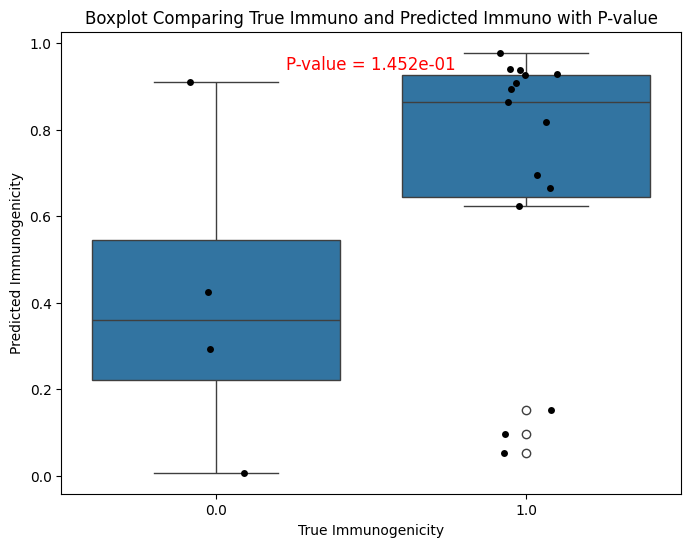

In [123]:
from scipy import stats

df = caron_plot_df


# Perform a statistical test (t-test) to get the p-value between the two groups
group1 = df[df['true_immuno'] == 0]['predicted_immuno']
group2 = df[df['true_immuno'] == 1]['predicted_immuno']
t_stat, p_value = stats.ttest_ind(group1, group2)

# Create a boxplot comparing true_immuno and predicted_immuno, adding points and p-value
plt.figure(figsize=(8, 6))
sns.boxplot(x='true_immuno', y='predicted_immuno', data=df)#, showmeans=True, meanline=True)
sns.stripplot(x='true_immuno', y='predicted_immuno', data=df, color='black', jitter=True, size=5)

# Add p-value to the plot
plt.text(0.5, 0.95, f'P-value = {p_value:.3e}', ha='center', va='center', fontsize=12, color='red')

plt.title('Boxplot Comparing True Immuno and Predicted Immuno with P-value')
plt.xlabel('True Immunogenicity')
plt.ylabel('Predicted Immunogenicity')
plt.show()


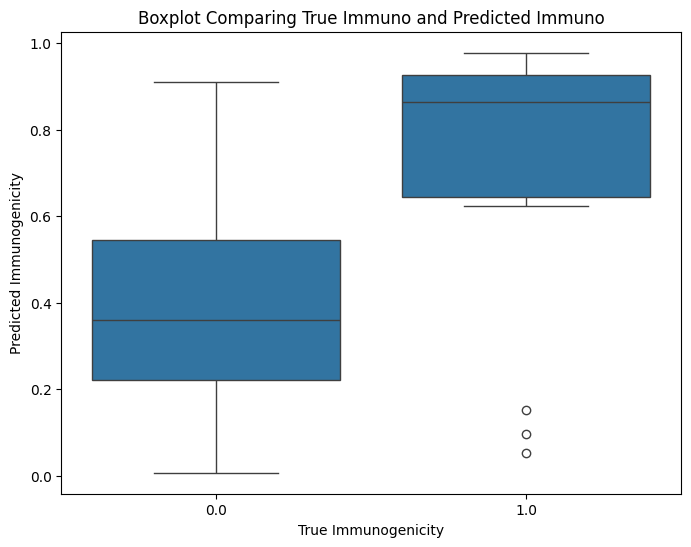

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
df = caron_plot_df
# Create a boxplot comparing true_immuno and predicted_immuno
plt.figure(figsize=(8, 6))
sns.boxplot(x='true_immuno', y='predicted_immuno', data=df)
plt.title('Boxplot Comparing True Immuno and Predicted Immuno')
plt.xlabel('True Immunogenicity')
plt.ylabel('Predicted Immunogenicity')
plt.show()

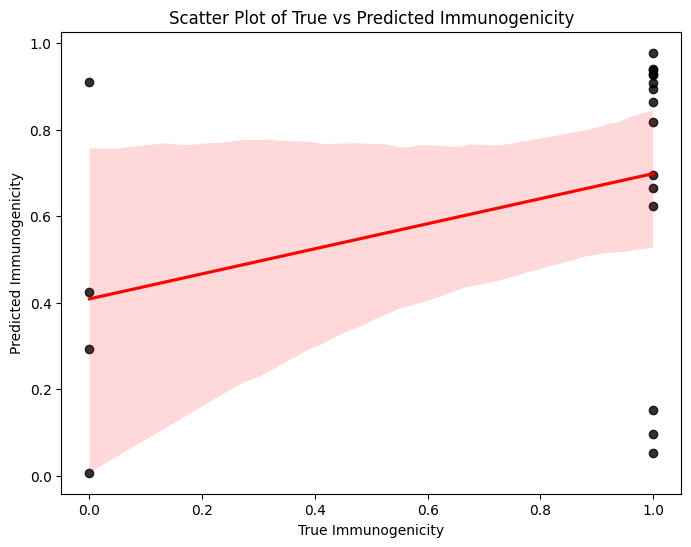

In [128]:
# Scatter plot with regression line to compare true vs predicted
plt.figure(figsize=(8, 6))
sns.regplot(x='true_immuno', y='predicted_immuno', data=df, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.title('Scatter Plot of True vs Predicted Immunogenicity')
plt.xlabel('True Immunogenicity')
plt.ylabel('Predicted Immunogenicity')
plt.show()


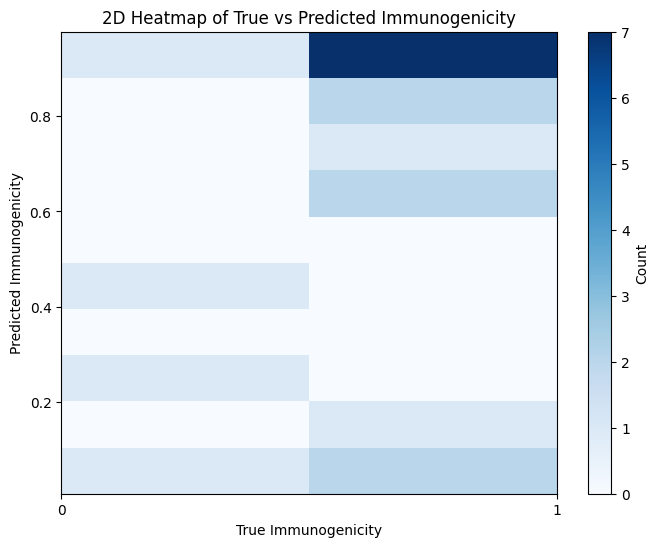

In [129]:
# Create a 2D histogram (heatmap style) to show density of predictions for true immunogenicity values
plt.figure(figsize=(8, 6))
plt.hist2d(df['true_immuno'], df['predicted_immuno'], bins=[2, 10], cmap='Blues')

plt.colorbar(label='Count')
plt.title('2D Heatmap of True vs Predicted Immunogenicity')
plt.xlabel('True Immunogenicity')
plt.ylabel('Predicted Immunogenicity')
plt.xticks([0, 1])
plt.show()


In [137]:
caron_plot_df['dash'] = '-'
caron_plot_df['combo'] = caron_plot_df['peptide'] + caron_plot_df['dash'] + caron_plot_df['hla']

In [138]:
caron_plot_df

,peptide,hla,true_immuno,predicted_immuno,dash,combo
0,STTTTNVTR,HLA-A*68:01,1.0,0.817480,-,STTTTNVTR-HLA-A*68:01
1,TGSNVFQTR,HLA-A*68:01,1.0,0.927289,-,TGSNVFQTR-HLA-A*68:01
2,HTTDPSFLGR,HLA-A*68:01,1.0,0.907564,-,HTTDPSFLGR-HLA-A*68:01
3,RTIKVFTTV,HLA-A*68:01,1.0,0.694275,-,RTIKVFTTV-HLA-A*68:01
4,APRITFGGP,HLA-B*07:02,1.0,0.863238,-,APRITFGGP-HLA-B*07:02
5,GPMVLRGLIT,HLA-B*07:02,1.0,0.665639,-,GPMVLRGLIT-HLA-B*07:02
6,RANNTKGSL,HLA-B*07:02,1.0,0.977535,-,RANNTKGSL-HLA-B*07:02
7,LPYPQILLL,HLA-B*07:02,1.0,0.097305,-,LPYPQILLL-HLA-B*07:02
8,NAPRITFGGP,HLA-B*07:02,1.0,0.925415,-,NAPRITFGGP-HLA-B*07:02
9,HSSGVTREL,HLA-A*68:02,0.0,0.910135,-,HSSGVTREL-HLA-A*68:02


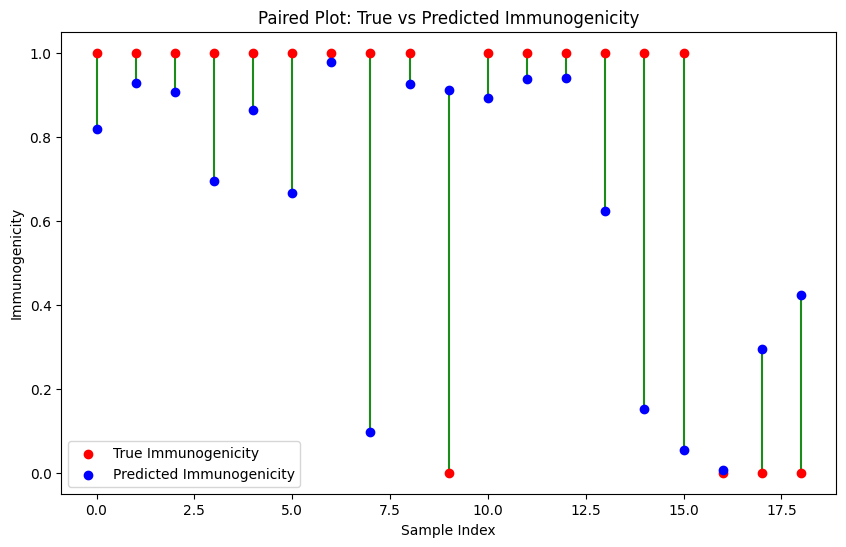

In [136]:
# Plot connecting true and predicted values for each sample
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['true_immuno'], label="True Immunogenicity", color='red', zorder=3)
plt.scatter(df.index, df['predicted_immuno'], label="Predicted Immunogenicity", color='blue', zorder=3)
plt.vlines(df.index, df['true_immuno'], df['predicted_immuno'], color='green', alpha=0.9)

plt.title('Paired Plot: True vs Predicted Immunogenicity')
plt.xlabel('Sample Index')
plt.ylabel('Immunogenicity')
plt.legend()
plt.show()


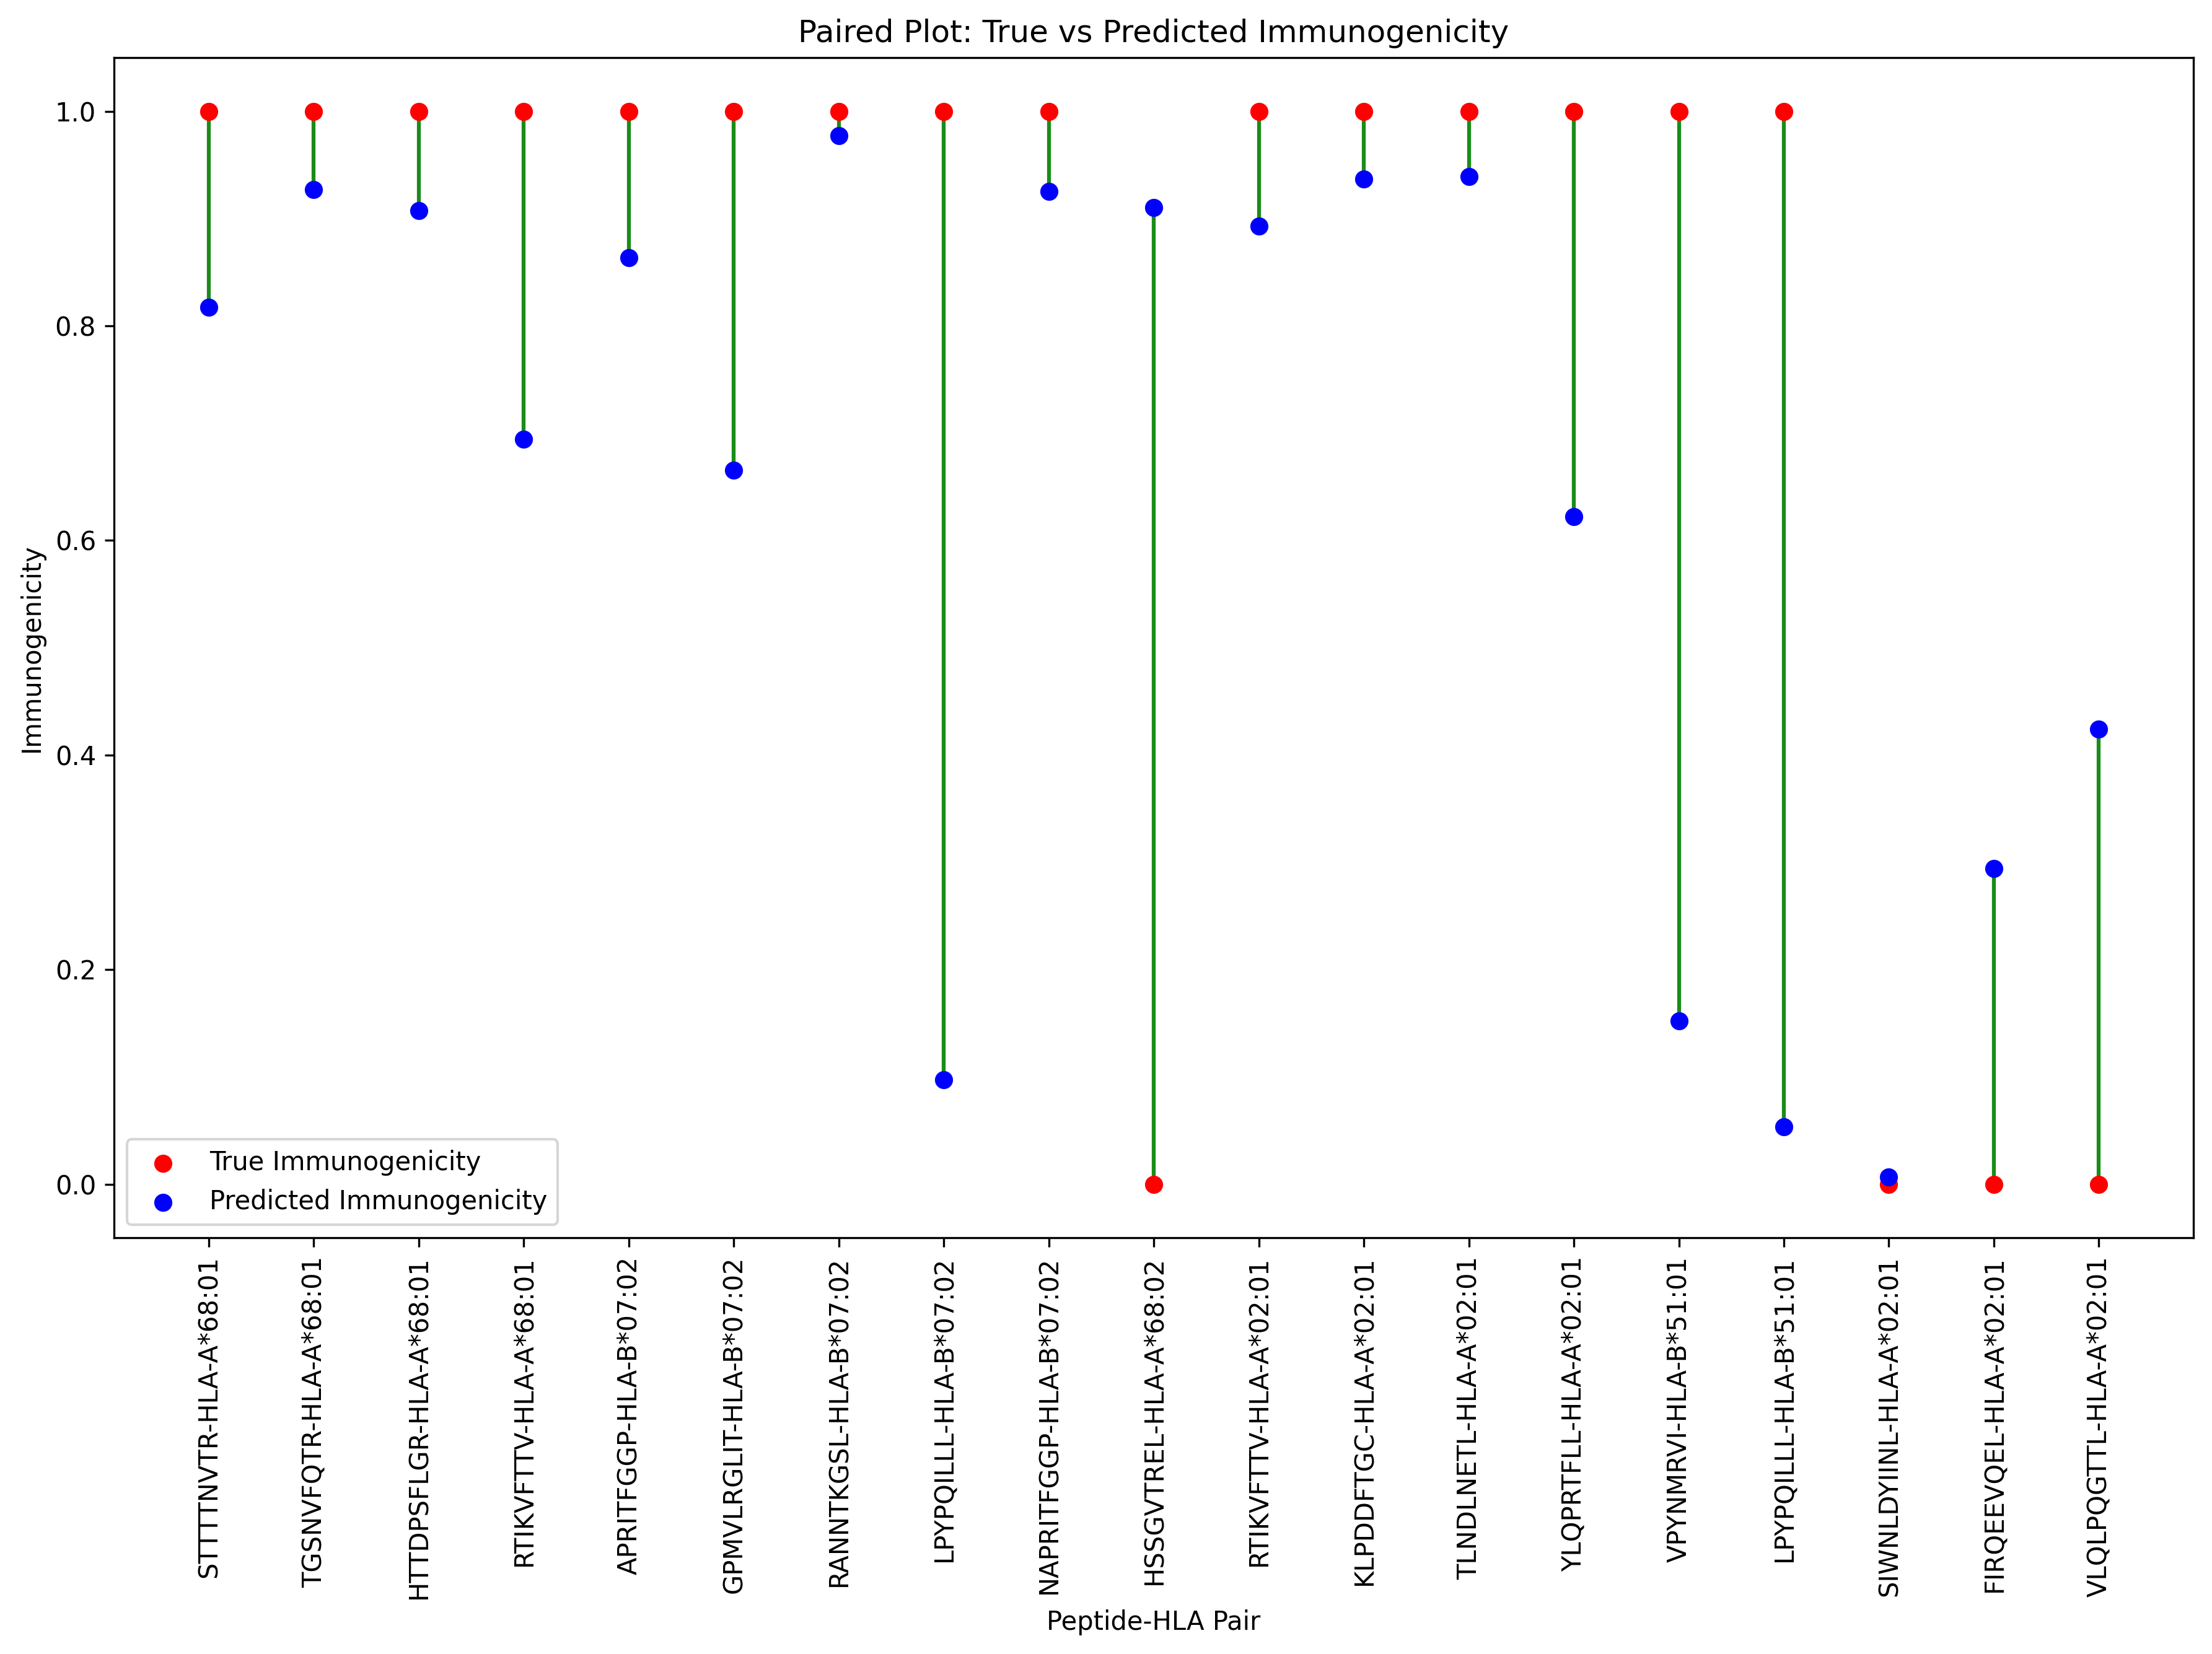

In [148]:
plt.figure(figsize=(12, 9), dpi= 300)
plt.scatter(df['combo'], df['true_immuno'], label="True Immunogenicity", color='red', zorder=3)
plt.scatter(df['combo'], df['predicted_immuno'], label="Predicted Immunogenicity", color='blue', zorder=3)
plt.vlines(df['combo'], df['true_immuno'], df['predicted_immuno'], color='green', alpha=0.9)

plt.title('Paired Plot: True vs Predicted Immunogenicity')
plt.xlabel('Peptide-HLA Pair')
plt.ylabel('Immunogenicity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

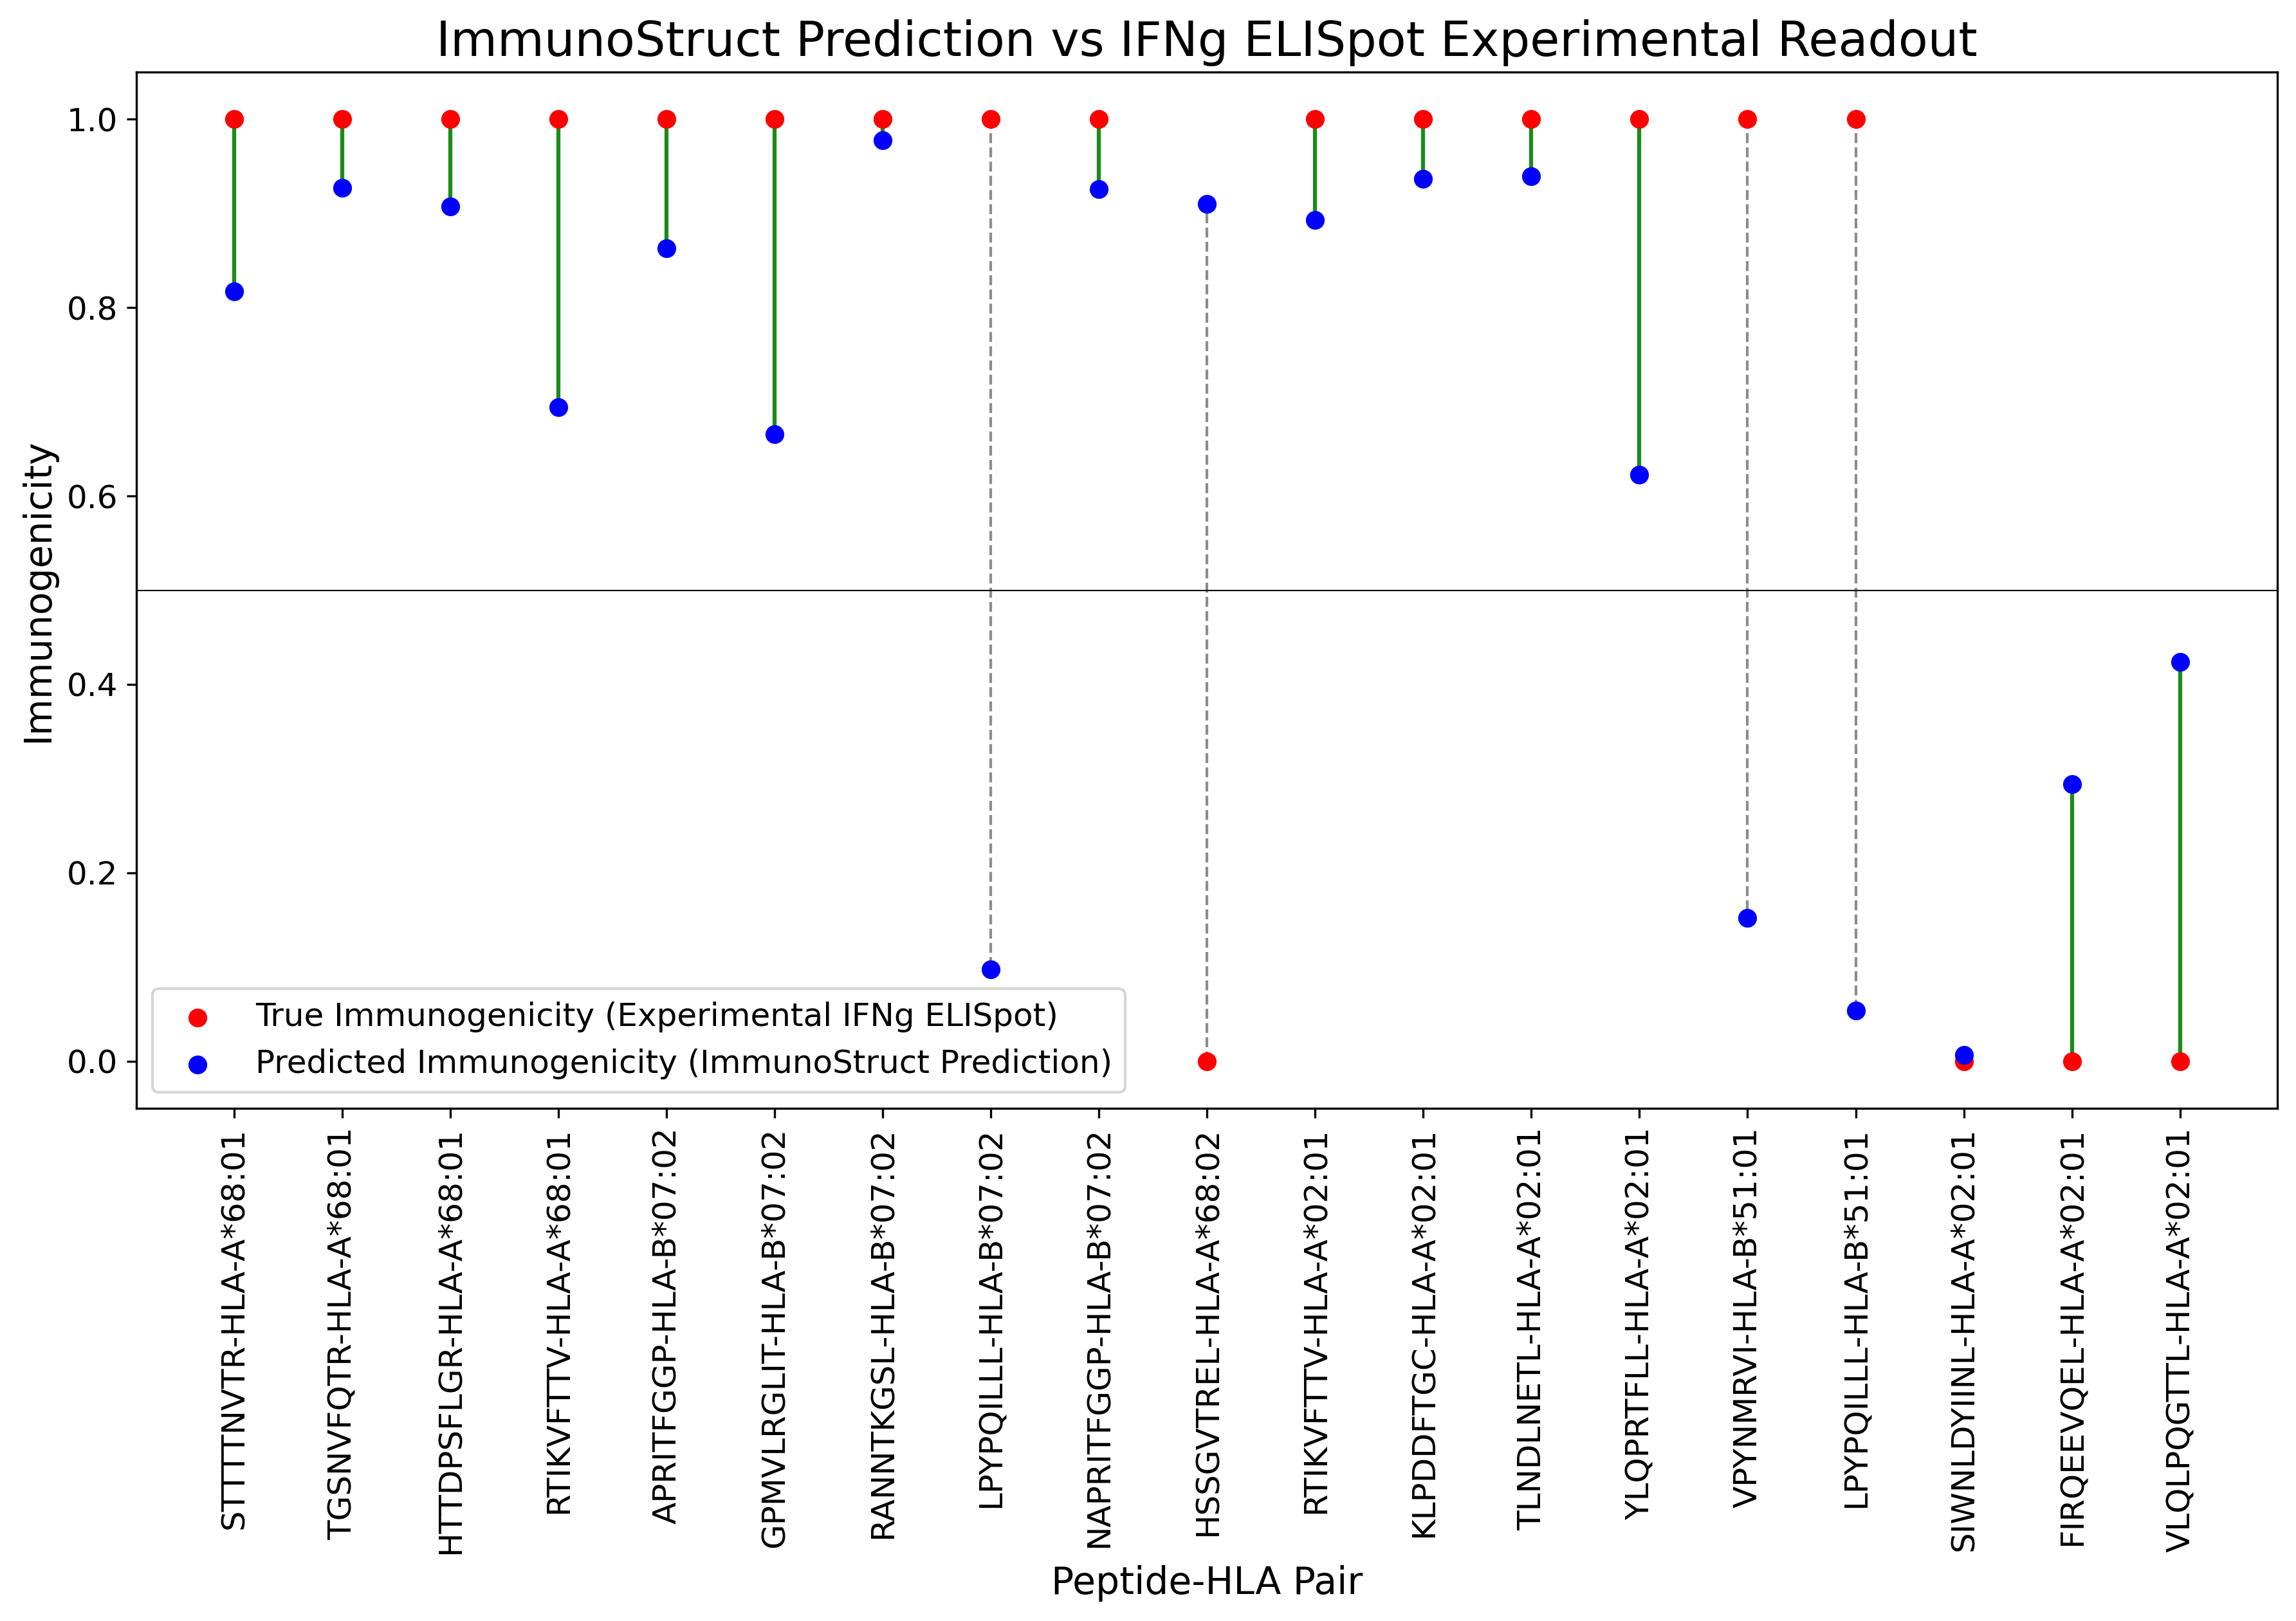

In [171]:
# Modifying the plot code to increase axis font sizes

# Marking the specific indices for dashed line connections
dashed_indices = [7, 9, 14, 15]

plt.figure(figsize=(12, 8.5), dpi=300)

# Scatter for true and predicted immunogenicity
plt.scatter(df['combo'], df['true_immuno'], label="True Immunogenicity (Experimental IFNg ELISpot)", color='red', zorder=3)
plt.scatter(df['combo'], df['predicted_immuno'], label="Predicted Immunogenicity (ImmunoStruct Prediction)", color='blue', zorder=3)

# Draw lines between points, dashed lines for the specified indices
for i in df.index:
    if i in dashed_indices:
        plt.vlines(df['combo'][i], df['true_immuno'][i], df['predicted_immuno'][i], color='grey', alpha=0.9, linestyle='--', linewidth=1)
    else:
        plt.vlines(df['combo'][i], df['true_immuno'][i], df['predicted_immuno'][i], color='green', alpha=0.9, linewidth=1.5)

# Add horizontal line at y=0.5 for cutoff
plt.axhline(y=0.5, color='black', linestyle='-', linewidth=0.5)

# Update title and axis labels with larger font size
plt.title('ImmunoStruct Prediction vs IFNg ELISpot Experimental Readout', fontsize=18)
plt.xlabel('Peptide-HLA Pair', fontsize=14)
plt.ylabel('Immunogenicity', fontsize=14)

# Adjust tick label sizes
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Legend with larger font size
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


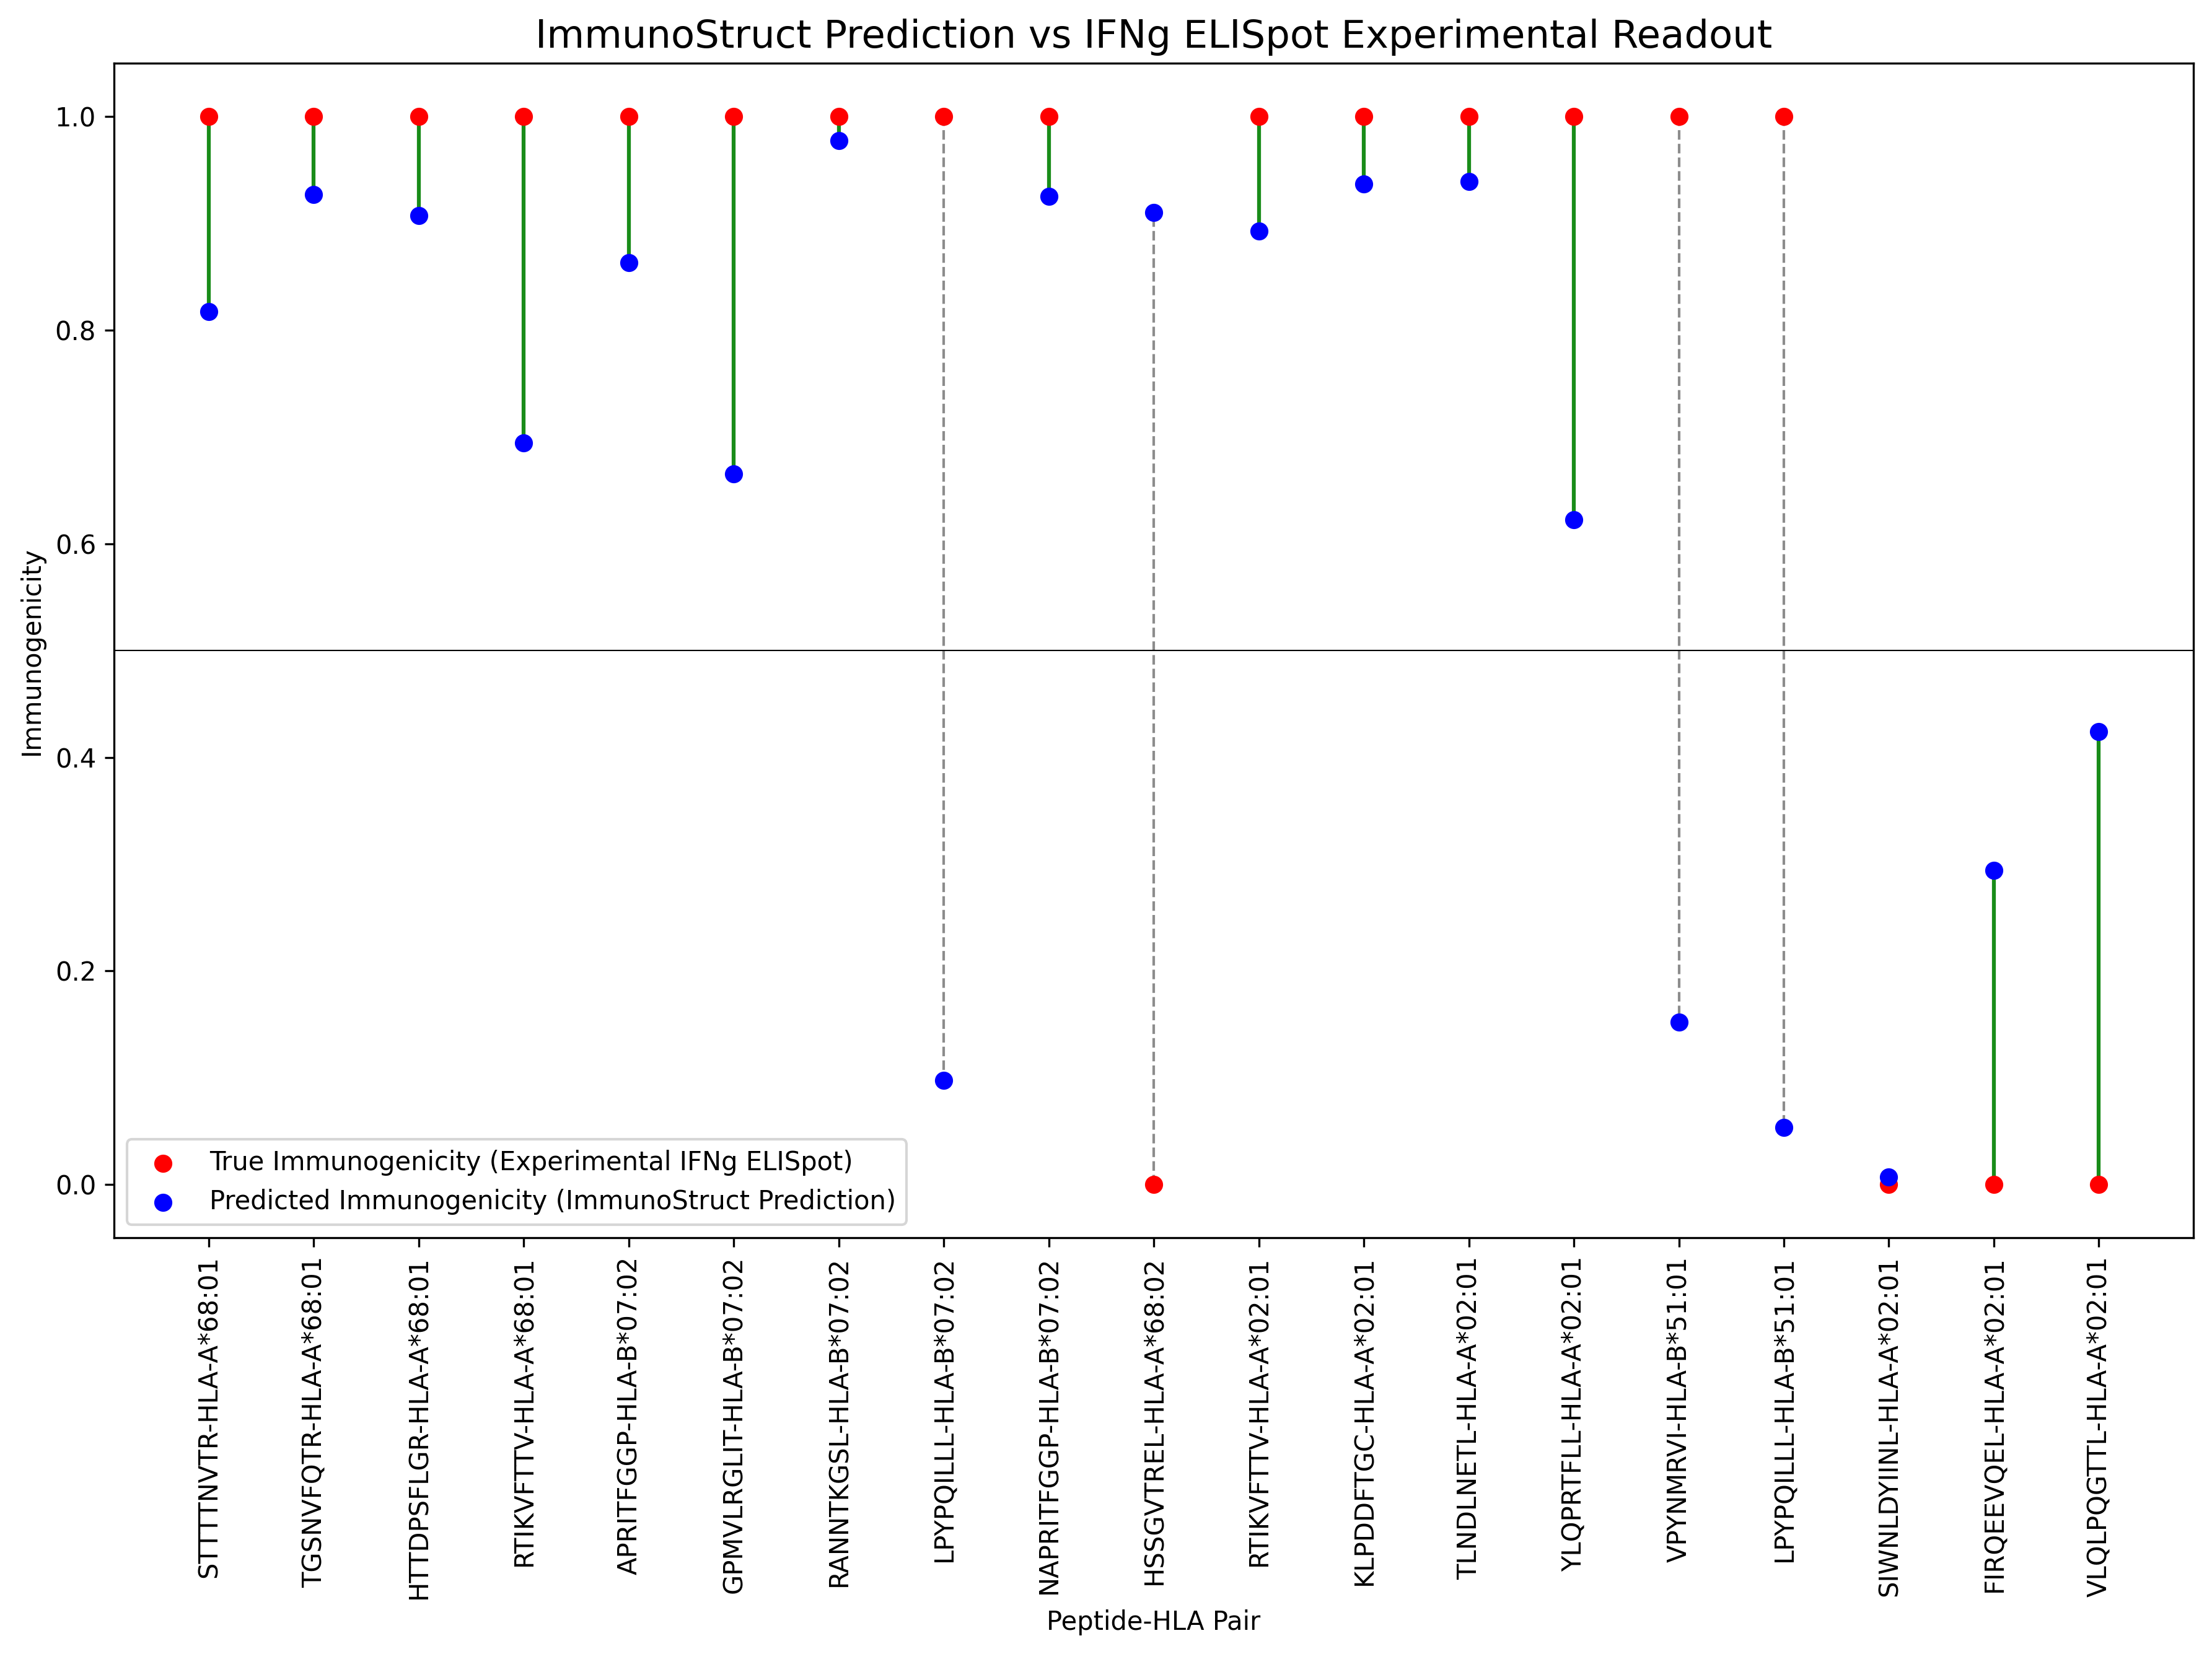

In [162]:

# Marking the specific indices for dashed line connections
dashed_indices = [7, 9, 14, 15]

plt.figure(figsize=(12, 9), dpi= 300)
# Scatter for true and predicted immunogenicity
plt.scatter(df['combo'], df['true_immuno'], label="True Immunogenicity (Experimental IFNg ELISpot)", color='red', zorder=3)
plt.scatter(df['combo'], df['predicted_immuno'], label="Predicted Immunogenicity (ImmunoStruct Prediction)", color='blue', zorder=3)



# Draw lines between points, dashed lines for the specified indices
for i in df.index:
    if i in dashed_indices:
        plt.vlines(df['combo'][i], df['true_immuno'][i], df['predicted_immuno'][i], color='grey', alpha=0.9, linestyle='--', linewidth=1)
    else:
        plt.vlines(df['combo'][i], df['true_immuno'][i], df['predicted_immuno'][i], color='green', alpha=0.9,linewidth=1.5)

        

plt.axhline(y=0.5, color='black', linestyle='-', linewidth=0.5)
        
plt.title('ImmunoStruct Prediction vs IFNg ELISpot Experimental Readout', fontsize = 15)
plt.xlabel('Peptide-HLA Pair')
plt.ylabel('Immunogenicity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

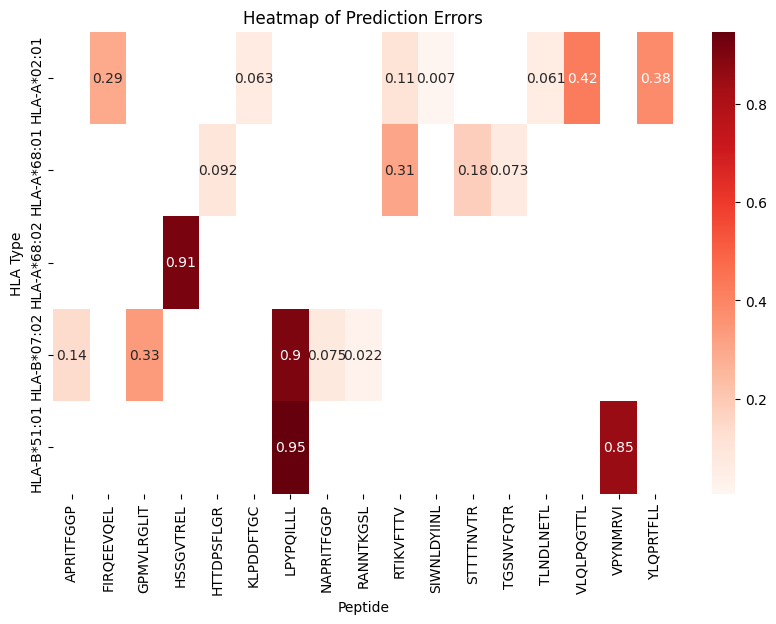

In [140]:
# Calculate absolute errors
df['error'] = abs(df['predicted_immuno'] - df['true_immuno'])

# Pivot data for heatmap: HLA types and peptides vs error magnitude
heatmap_data = df.pivot_table(index='hla', columns='peptide', values='error')

# Plot heatmap showing the magnitude of errors
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Reds')
plt.title('Heatmap of Prediction Errors')
plt.xlabel('Peptide')
plt.ylabel('HLA Type')
plt.show()



In [108]:
# Perform a statistical test (t-test) to get the p-value between the two groups
group1 = df[df['true_immuno'] == 0]['predicted_immuno']
group2 = df[df['true_immuno'] == 1]['predicted_immuno']
t_stat, p_value = stats.ttest_ind(group1, group2)
p_value

0.14517501189079982

In [29]:
caron_data

['STTTTNVTR',
 'TGSNVFQTR',
 'HTTDPSFLGR',
 'RTIKVFTTV',
 'APRITFGGP',
 'GPMVLRGLIT',
 'RANNTKGSL',
 'LPYPQILLL',
 'NAPRITFGGP',
 'HSSGVTREL',
 'RTIKVFTTV',
 'KLPDDFTGC',
 'TLNDLNETL',
 'YLQPRTFLL',
 'VPYNMRVI',
 'LPYPQILLL']

In [30]:
caron_hlas

['HLA-A*68:01',
 'HLA-A*68:01',
 'HLA-A*68:01',
 'HLA-A*68:01',
 'HLA-B*07:02',
 'HLA-B*07:02',
 'HLA-B*07:02',
 'HLA-B*07:02',
 'HLA-B*07:02',
 'HLA-A*68:02',
 'HLA-A*02:01',
 'HLA-A*02:01',
 'HLA-A*02:01',
 'HLA-A*02:01',
 'HLA-B*51:01',
 'HLA-B*51:01']

In [ ]:
numbers = probs_raw


import matplotlib.pyplot as plt


# Create a figure with a higher DPI (e.g., 200)
plt.figure(dpi=300)
# Create a histogram to visualize the distribution
plt.hist(numbers, bins=30, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Predicted Immunogenicity Probabilities')
plt.xlabel('Predicted Immunogenicity Score')
plt.ylabel('Count')

# Add a red vertical line at 0.73
plt.axvline(x=0.83, color='red', linestyle='--', linewidth=2, label='KLPDDFTGC-A0201')
plt.axvline(x=0.90, color='red', linestyle='--', linewidth=2, label='KLPDDFTGC-A0201')
plt.axvline(x=0.88, color='red', linestyle='--', linewidth=2, label='KLPDDFTGC-A0201')


# Add a label for the red line
plt.text(0.83, plt.ylim()[1] * 0.9, 'KLPDDFTGC-A0201', color='blue', ha='left')

# Add a label for the red line
plt.text(0.90, plt.ylim()[1] * 0.4, 'YLQPRTFLL-A0201', color='blue', ha='left')

plt.text(0.88, plt.ylim()[1] * 0.6, 'APRITFGGP-B0702', color='blue', ha='left')



# Display the plot
plt.show()

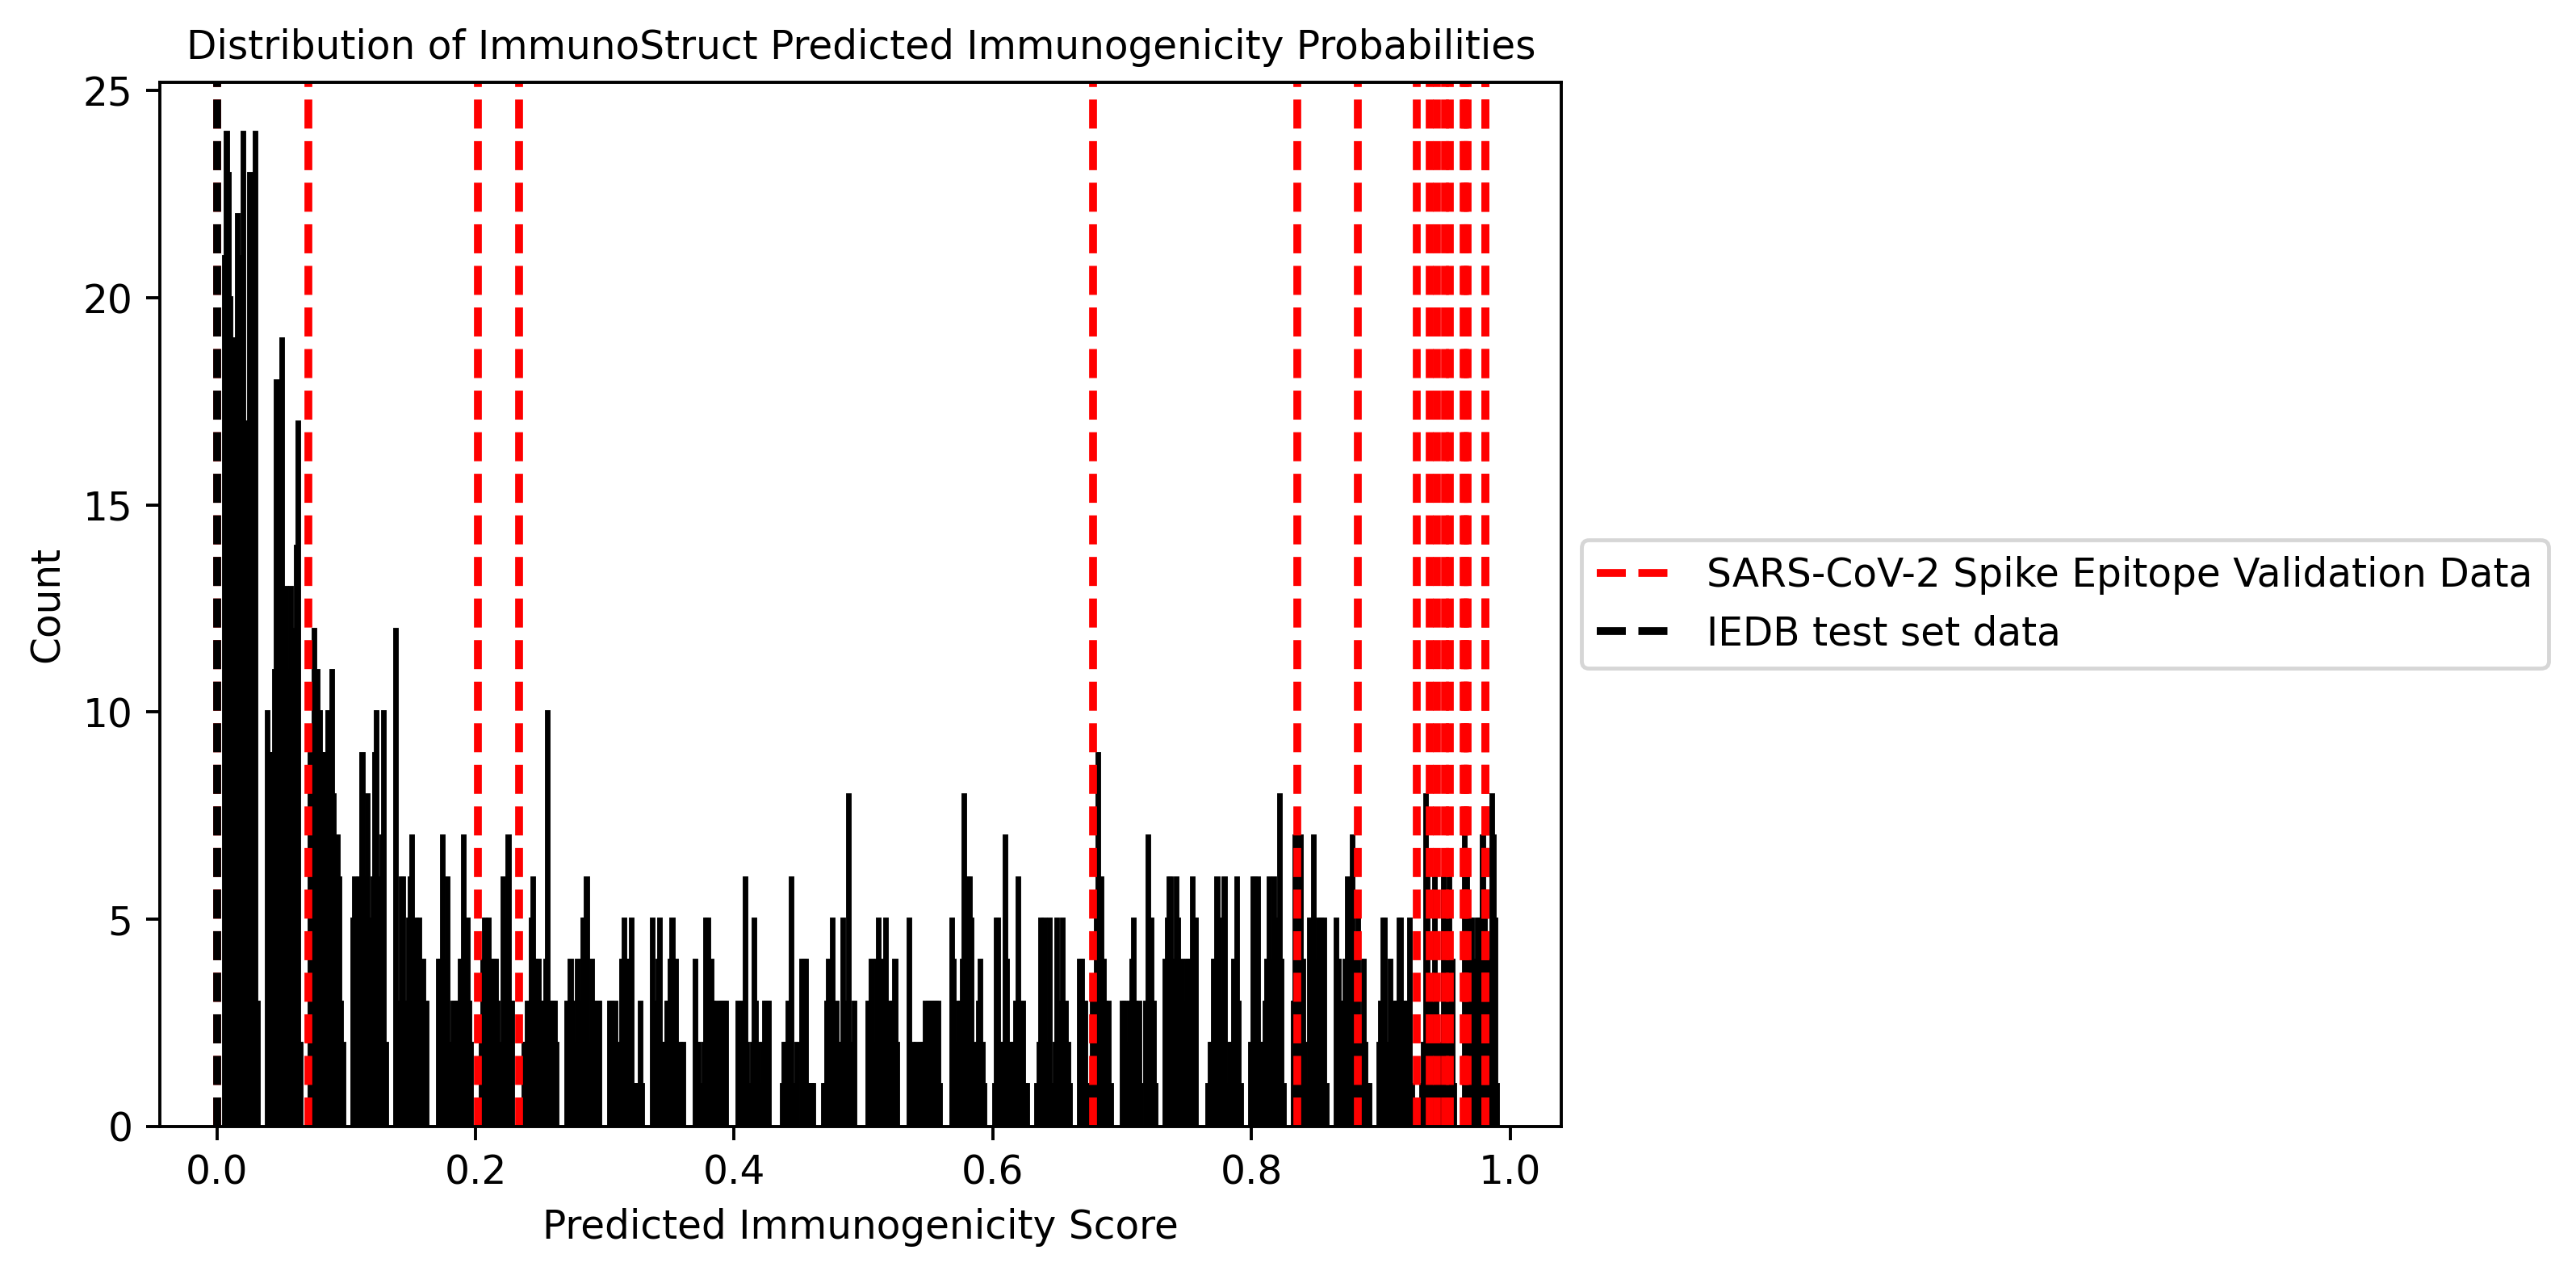

In [31]:
# Create a figure with a higher DPI (e.g., 300)
plt.figure(dpi=350)

# Create a histogram to visualize the distribution
plt.hist(numbers, bins=30, edgecolor='black')

# Add titles and labels
plt.title('Distribution of ImmunoStruct Predicted Immunogenicity Probabilities', fontsize=10)
plt.xlabel('Predicted Immunogenicity Score')
plt.ylabel('Count')

# Loop through caron_preds and caron_data to add red vertical lines and text labels
for pred, peptide in zip(caron_preds, caron_data):
    plt.axvline(x=pred, color='red', linestyle='--', linewidth=2)
    #plt.text(pred, plt.ylim()[1] * 0.9, peptide, color='blue', ha='left')

    
    
# Add the red line label to the legend
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='SARS-CoV-2 Spike Epitope Validation Data')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='IEDB test set data')



# Add legend to explain the colors
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Display the plot
plt.show()

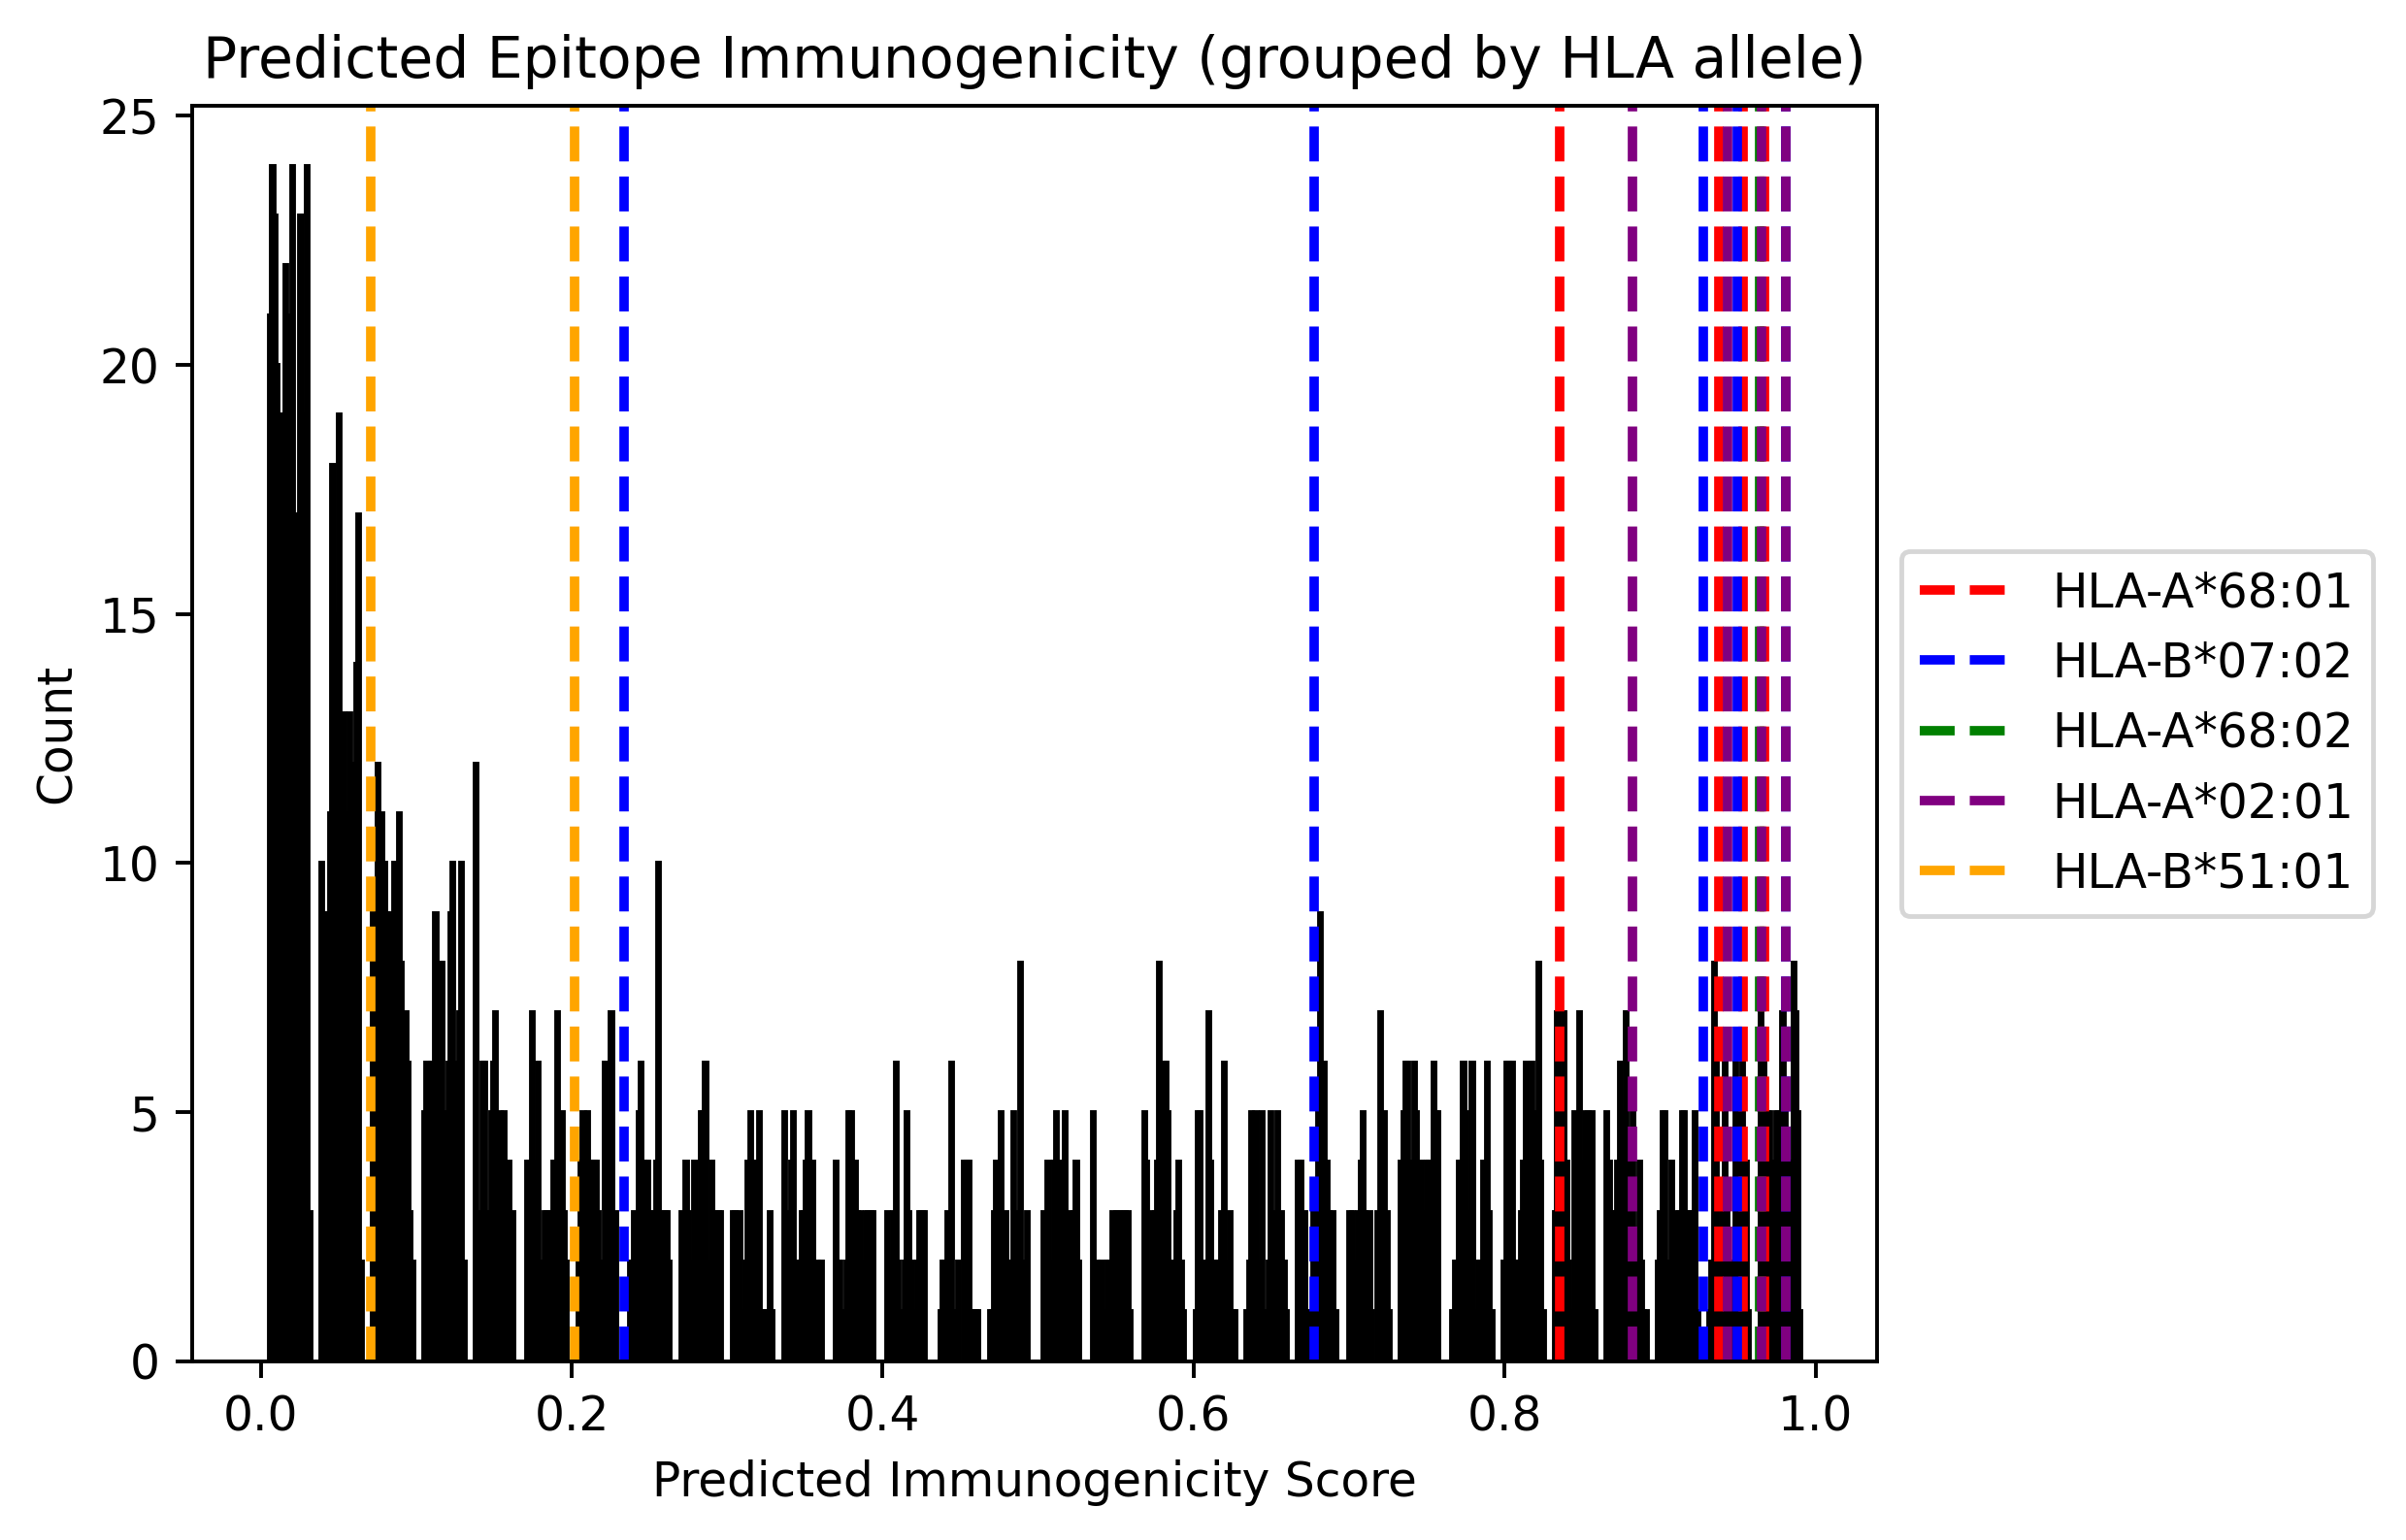

In [32]:
# Create a figure with a higher DPI (e.g., 300)





plt.figure(dpi=350)
hla_alleles = caron_hlas




# Define a color map for HLA alleles
color_map = {
    'HLA-A*68:01': 'red',
    'HLA-A*68:02': 'green',
    'HLA-B*07:02': 'blue',
    'HLA-A*02:01': 'purple',
    'HLA-B*51:01': 'orange'
}



# Create a histogram to visualize the distribution
plt.hist(numbers, bins=30, edgecolor='black')

# Add titles and labels
plt.title('Predicted Epitope Immunogenicity (grouped by HLA allele)')
plt.xlabel('Predicted Immunogenicity Score')
plt.ylabel('Count')

# Loop through caron_preds, caron_data, and hla_alleles to add colored vertical lines and text labels
for pred, peptide, hla in zip(caron_preds, caron_data, hla_alleles):
    color = color_map[hla]  # Get the color corresponding to the HLA allele
    plt.axvline(x=pred, color=color, linestyle='--', linewidth=2, label=hla)
    #plt.text(pred, plt.ylim()[1] * 0.9, peptide, color=color, ha='left')

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))


# Move the legend off to the side
plt.legend(unique_labels.values(), unique_labels.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the plot to make space for the legend on the right
#plt.tight_layout(rect=[0, 0, 0.75, 1])


# Display the plot
plt.show()

In [173]:
len(true_targets)

2333

In [34]:
numbers

[tensor([0.0682, 0.1022, 0.5817, 0.2275, 0.5512, 0.1472, 0.1788, 0.5397, 0.5916,
         0.7312, 0.1451, 0.1792, 0.3329, 0.1437, 0.8329, 0.1407, 0.8287, 0.7124,
         0.1600, 0.5549, 0.0113, 0.0788, 0.0945, 0.0166, 0.4211, 0.9830, 0.8754,
         0.4187, 0.7423, 0.0276, 0.6633, 0.5846, 0.1214, 0.0877, 0.0329, 0.6431,
         0.0649, 0.0053, 0.0070, 0.0339, 0.8346, 0.1205, 0.0704, 0.2551, 0.1419,
         0.2910, 0.1435, 0.0102, 0.8757, 0.9434, 0.8810, 0.3886, 0.1477, 0.9878,
         0.0085, 0.0853, 0.0138, 0.0165, 0.6778, 0.0636, 0.1509, 0.5927, 0.3530,
         0.0787, 0.3855, 0.9851, 0.0124, 0.0480, 0.9626, 0.8266, 0.9017, 0.6903,
         0.0385, 0.0556, 0.1120, 0.7356, 0.0970, 0.2672, 0.3144, 0.0574, 0.0689,
         0.0196, 0.6050, 0.7841, 0.3524, 0.2559, 0.8242, 0.3228, 0.4154, 0.1995,
         0.7001, 0.7379, 0.2890, 0.3808, 0.3951, 0.0108, 0.7129, 0.0264, 0.9883,
         0.0734, 0.3050, 0.0085, 0.0021, 0.8822, 0.5884, 0.6901, 0.0368, 0.9893,
         0.3600, 0.1413, 0.0

In [57]:
plt.clf()

<Figure size 640x480 with 0 Axes>

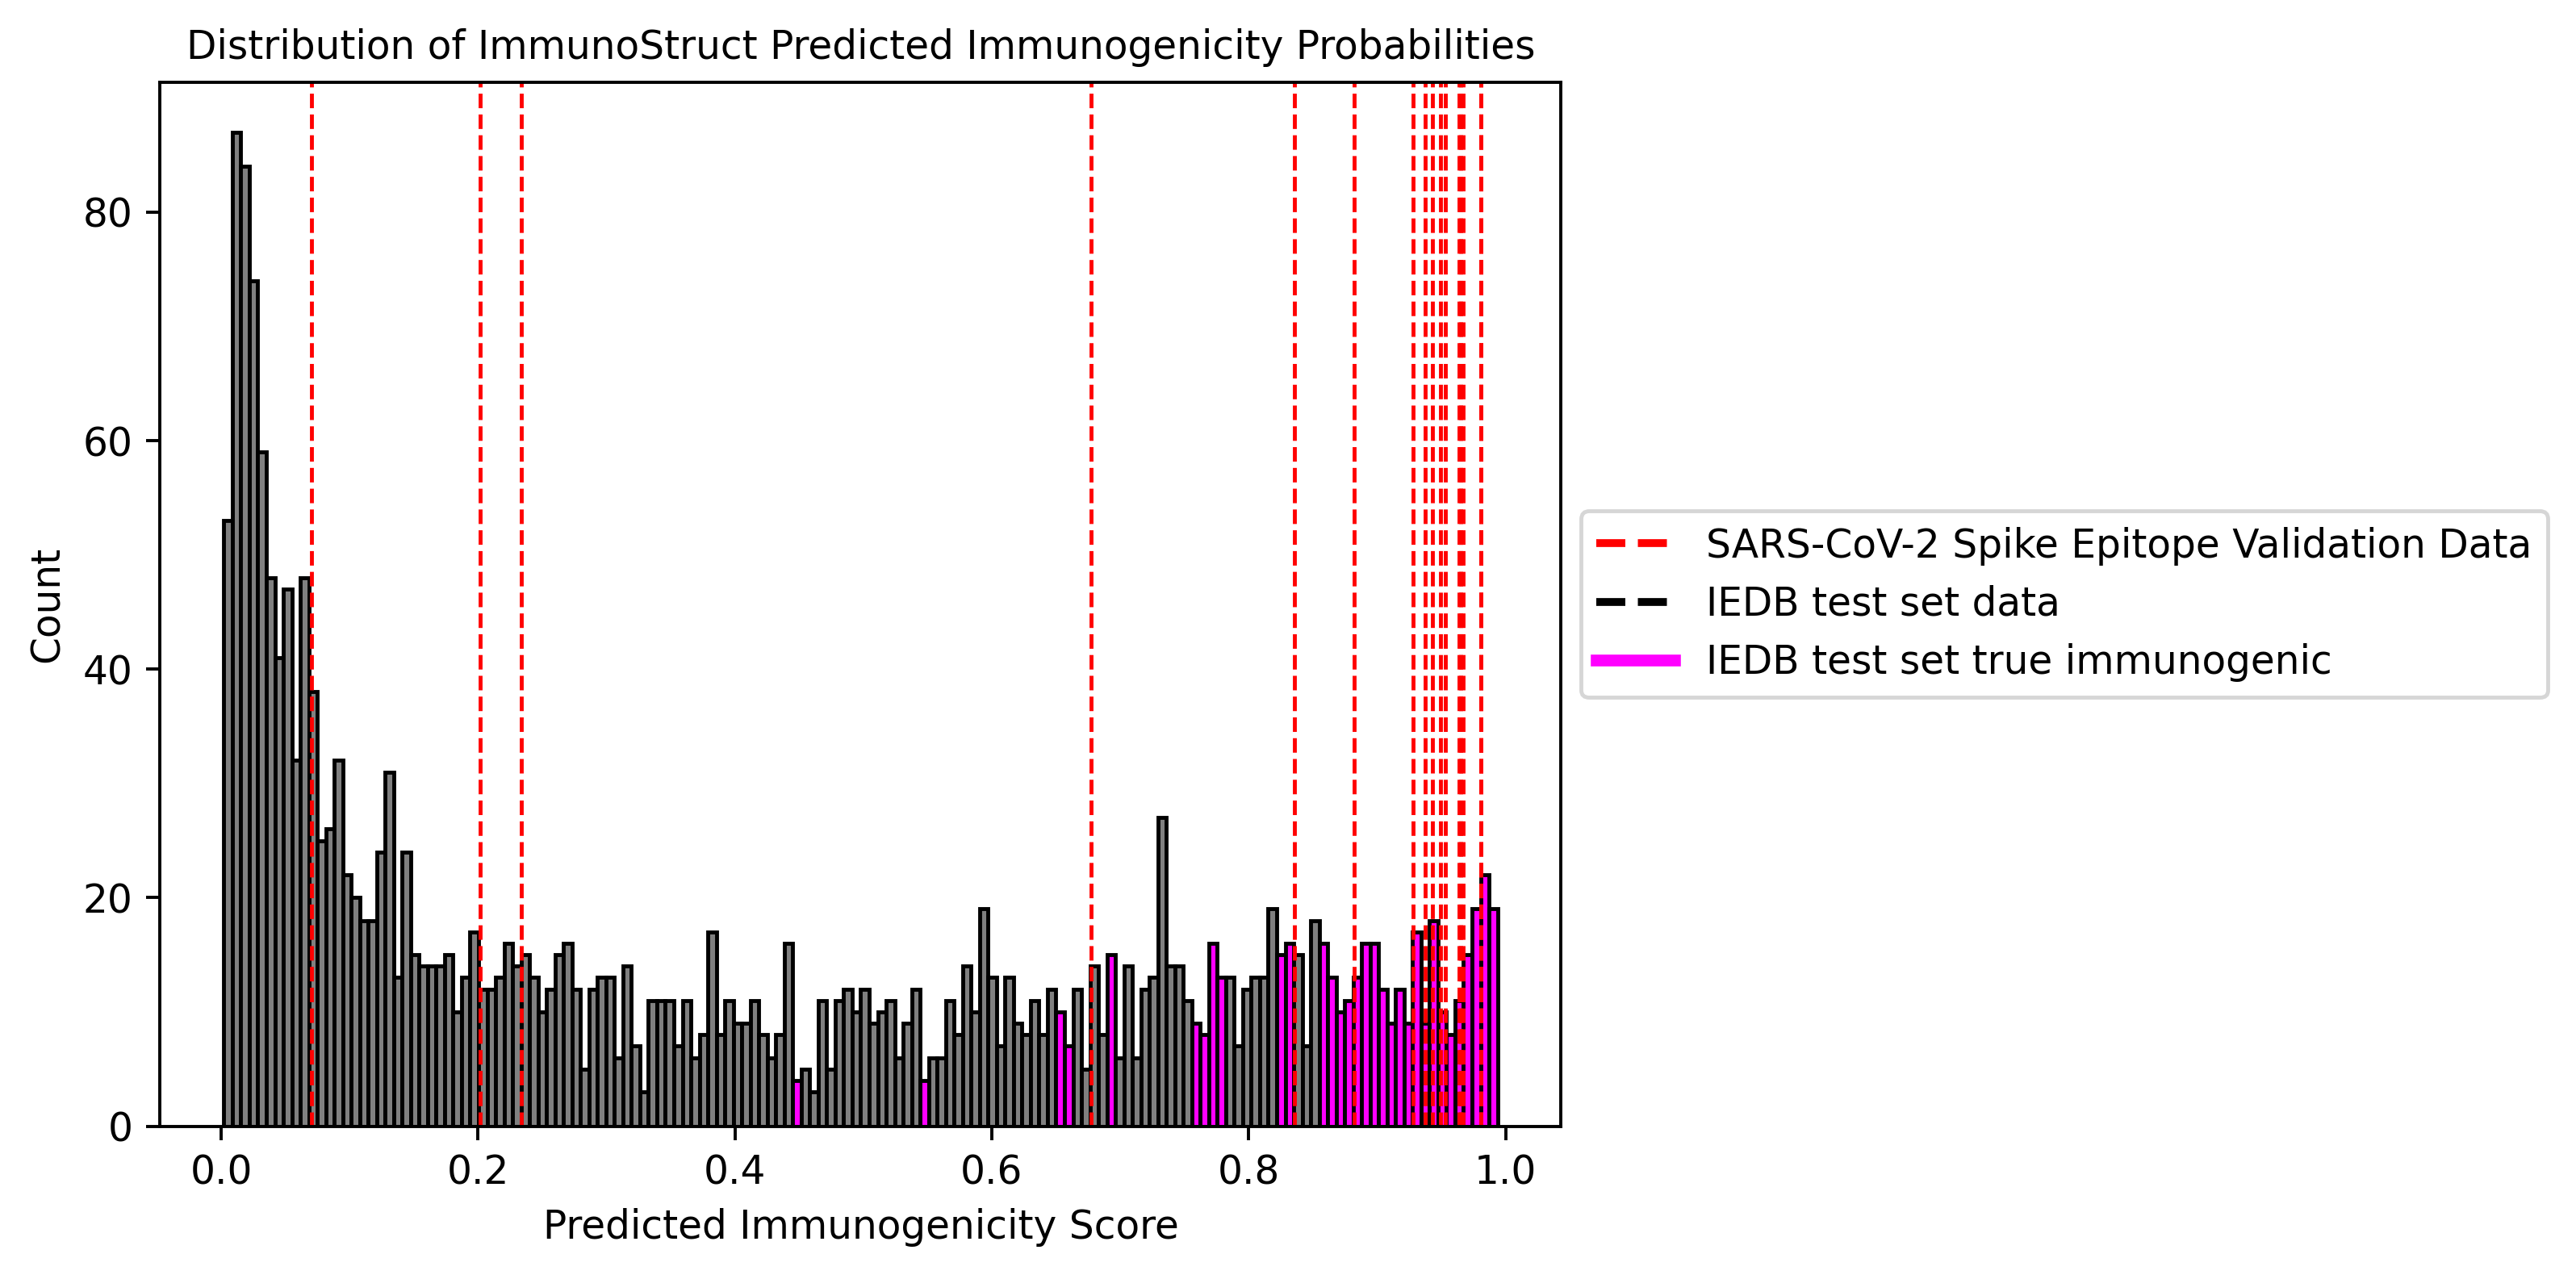

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Convert the list of PyTorch tensors to a NumPy array
numbers = [x.numpy() if isinstance(x, torch.Tensor) else np.array(x) for x in probs_raw]  # Convert each tensor to NumPy array
numbers = np.concatenate(numbers)  # Flatten the list into a single NumPy array

# Assuming true_targets is already a NumPy array
true_targets = np.array(true_targets)

# Define a color map for true_targets (e.g., 1 is blue, 0 is gray)
target_color_map = {0: 'gray', 1: 'magenta'}

# Create a figure with a higher DPI (e.g., 300)
plt.figure(dpi=350)

# Create a histogram but don't plot it yet
n, bins, patches = plt.hist(numbers, bins=150, edgecolor='black')

# Get the bin index for each number in `numbers`
bin_indices = np.digitize(numbers, bins)  # Assigns each number to a bin

# Loop through each bin and color based on the majority of true_targets in that bin
for i in range(1, len(bins)):  # Start from 1 because bin indices start from 1
    # Create a mask for values that fall into the current bin
    bin_mask = bin_indices == i
    
    # If there are any points in this bin, check the majority of true_targets
    if np.sum(bin_mask) > 0:
        # Calculate the proportion of 1s in this bin
        proportion_1s = np.mean(true_targets[bin_mask])
        
        # Color the bin blue if the majority are 1s, else color gray
        if proportion_1s > 0.49:
            patches[i-1].set_facecolor(target_color_map[1])  # Color blue (majority 1s)
        else:
            patches[i-1].set_facecolor(target_color_map[0])  # Color gray (majority 0s)
    else:
        patches[i-1].set_facecolor('white')  # No values in this bin

        
        
        

# Loop through caron_preds and caron_data to add red vertical lines and text labels
for pred, peptide in zip(caron_preds, caron_data):
    plt.axvline(x=pred, color='red', linestyle='--', linewidth=1)
    #plt.text(pred, plt.ylim()[1] * 0.9, peptide, color='blue', ha='left')

    
    
# Add the red line label to the legend
plt.plot([], [], color='red', linestyle='--', linewidth=2, label='SARS-CoV-2 Spike Epitope Validation Data')
plt.plot([], [], color='black', linestyle='--', linewidth=2, label='IEDB test set data')

# Create a dummy magenta line for the legend, but don't plot it
plt.plot([], [], color='magenta', linestyle='-', linewidth=3, label='IEDB test set true immunogenic')


        
# Add titles and labels
plt.title('Distribution of ImmunoStruct Predicted Immunogenicity Probabilities', fontsize=10)
plt.xlabel('Predicted Immunogenicity Score')
plt.ylabel('Count')


 # Add legend to explain the colors
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
       
# Display the plot

plt.show()

